# Customer churn prediction with 93% accuracy.

#### Get the data from Kaggle.
 https://www.kaggle.com/search?q=Customer+churn+prediction+in%3Adatasets

In [ ]:
# Importing relevant libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = pd.read_csv(r'test.csv')
test.sample()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
8,9,NJ,149,area_code_408,no,no,0,140.4,94,23.87,271.8,92,23.1,188.3,108,8.47,11.1,9,3.0,1


In [ ]:
train = pd.read_csv(r'train.csv')
train.sample(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3098,MA,79,area_code_408,no,yes,27,192.3,125,32.69,147.3,108,12.52,215.0,97,9.67,7.8,4,2.11,1,no
3342,OR,100,area_code_415,no,no,0,129.4,69,22.00,251.3,73,21.36,157.1,92,7.07,10.4,3,2.81,1,no
1393,TN,176,area_code_415,no,yes,23,283.2,130,48.14,162.6,74,13.82,177.7,104,8.00,7.2,6,1.94,1,no
4227,ND,81,area_code_415,no,no,0,234.1,105,39.80,237.4,88,20.18,240.6,85,10.83,11.4,4,3.08,1,no
2389,TX,130,area_code_408,no,no,0,252.0,101,42.84,170.2,105,14.47,209.2,64,9.41,5.7,5,1.54,0,no
270,ME,100,area_code_510,no,yes,30,58.8,104,10.00,219.5,107,18.66,152.3,118,6.85,7.1,3,1.92,0,no
1755,RI,75,area_code_415,no,no,0,190.5,91,32.39,178.4,75,15.16,162.4,113,7.31,13.1,5,3.54,1,no
246,AR,36,area_code_415,no,no,0,157.6,117,26.79,184.3,58,15.67,240.4,99,10.82,11.9,1,3.21,0,no
1441,OH,146,area_code_415,no,no,0,169.5,93,28.82,230.9,71,19.63,269.8,115,12.14,9.0,7,2.43,2,no
2284,UT,164,area_code_510,no,no,0,192.1,95,32.66,249.8,94,21.23,132.6,100,5.97,7.3,3,1.97,3,no


In [ ]:
test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
train.shape

(4250, 20)

In [ ]:
test.shape

(750, 20)

Data division:

The data was divided into two sets:

Train set: Contains 4250 data points, which is approximately 85% of the original data. This set is used to train the model.
Test set: Contains 750 data points, which is approximately 15% of the original data. This set is used to evaluate the performance of the trained model.
Conclusion:

The original data size was 5000 data points. It was divided into a train set of 4250 data points and a test set of 750 data points.

In [ ]:
# display all the features.
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
# Data Exploration¶
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
# check for missing or null values.
train.isnull().mean()

state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64

### there is no missing values present

In [ ]:
# describe the five points of statistics of numericals data
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Describe the string data
train.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
#checking for duplicae values.
train.duplicated().sum()

0

# EDA

## Univariate Analysis¶

### 1. Categorical Variables

In [ ]:
# extract the categorical variables
cat_var = [ feature for feature in train.columns if train[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

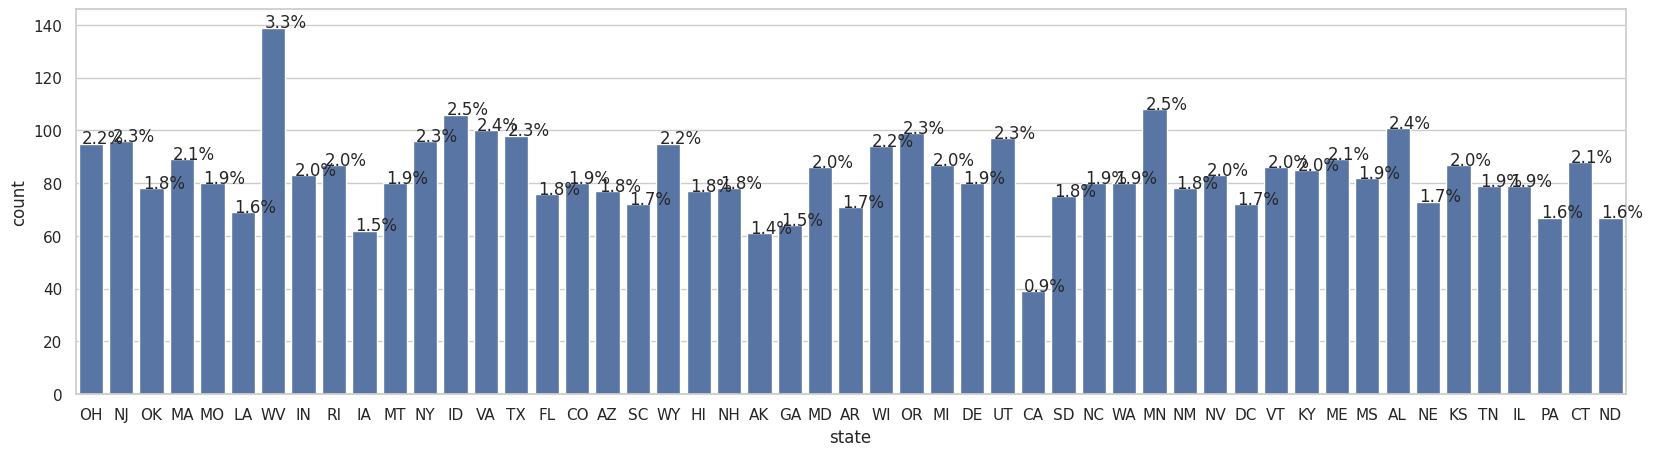

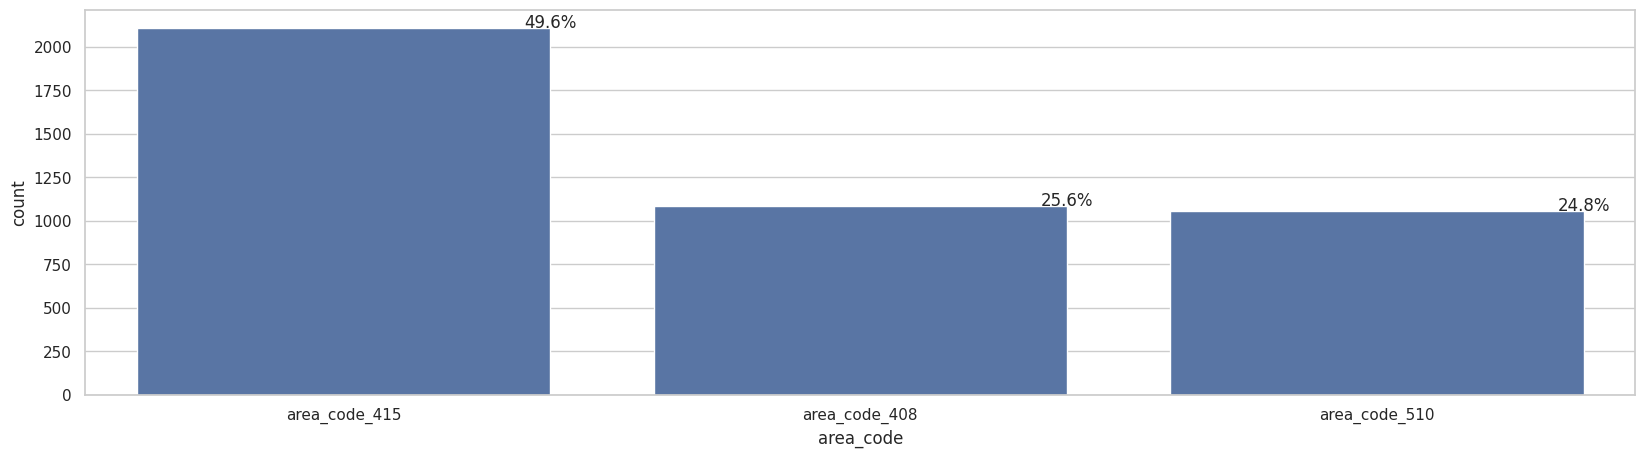

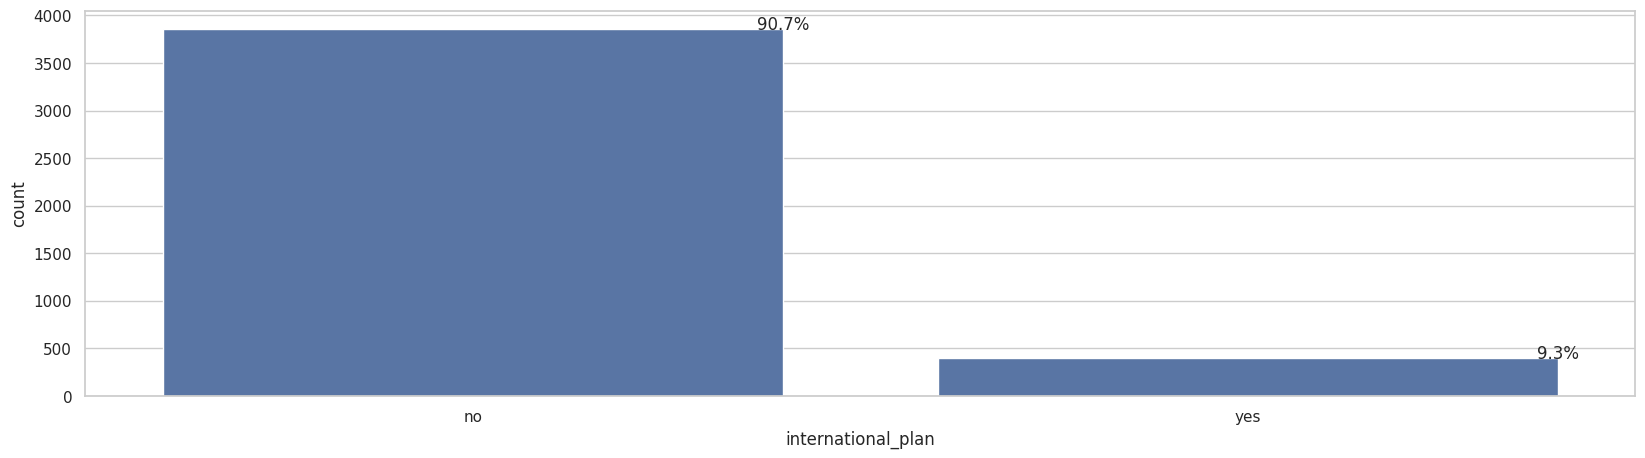

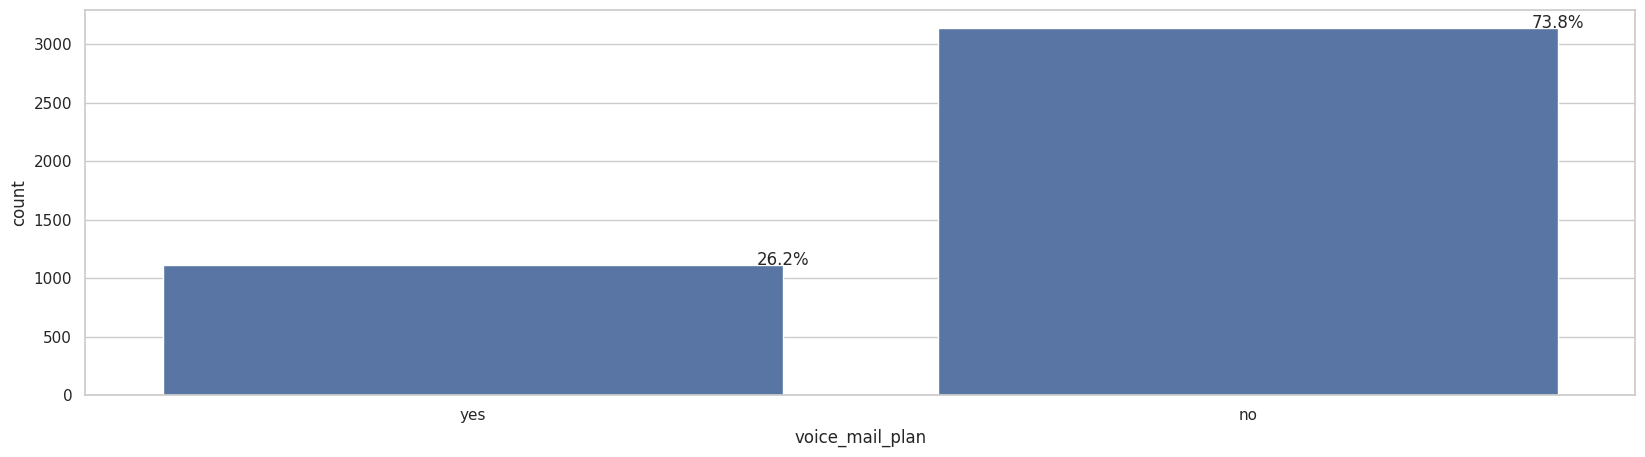

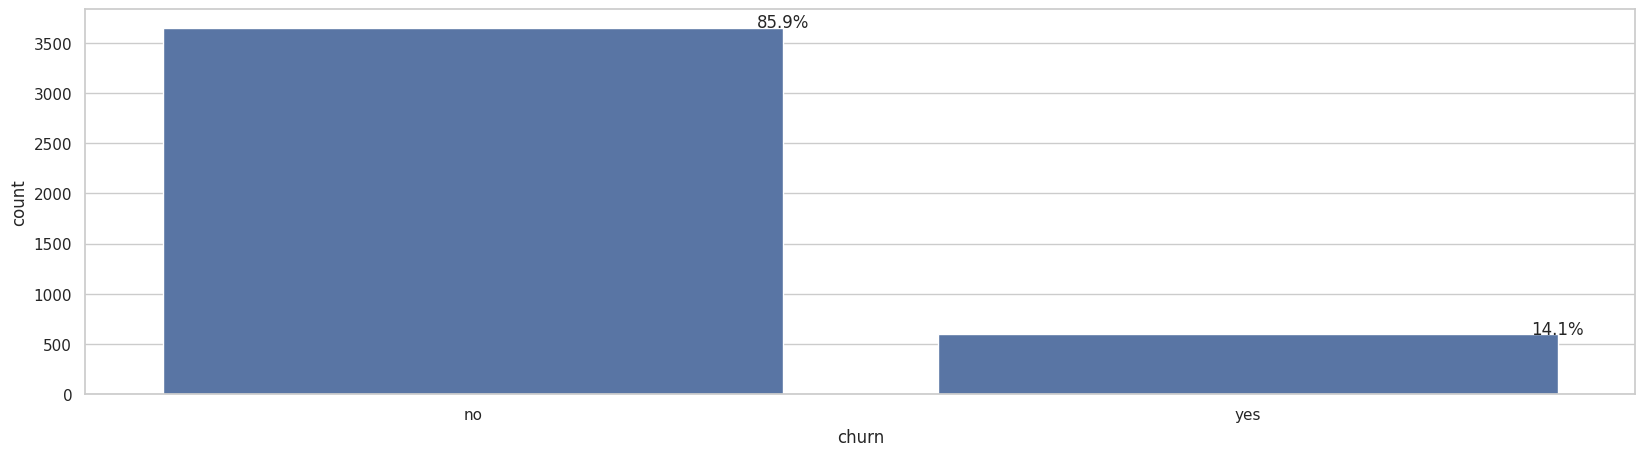

In [ ]:
#display the all the categorical variable
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(train)
    ax = sns.countplot(x = train[feature], data = train)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

See the above plot

1.   90.7% customers didn't have international plan

2.   73.8% customers didn't have voice mail plan
3.   49.6% customers are living in the area code area_code_415.


4.   only 14.1% customers are churn



### 2. Numerical Variables

In [ ]:
#Extract the numerical features from the dataset
num_var = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


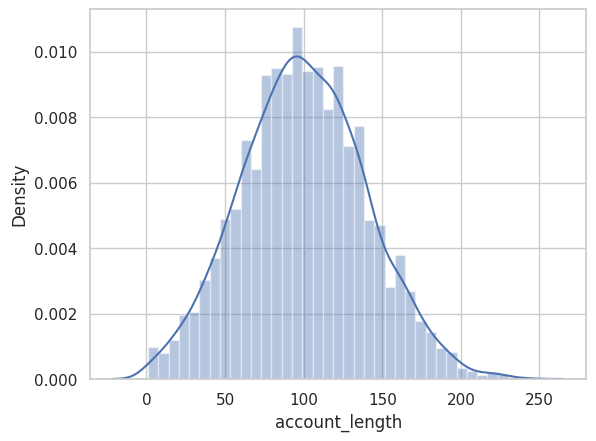

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


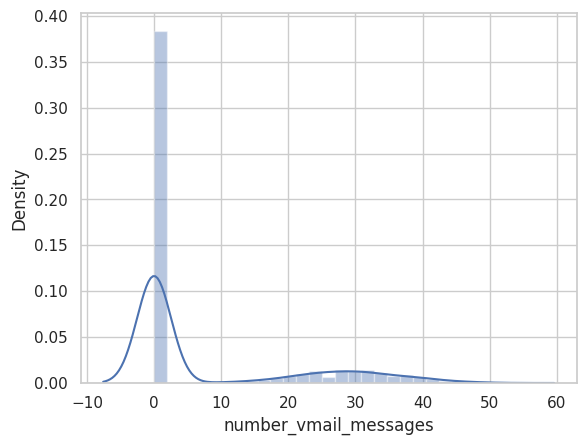

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


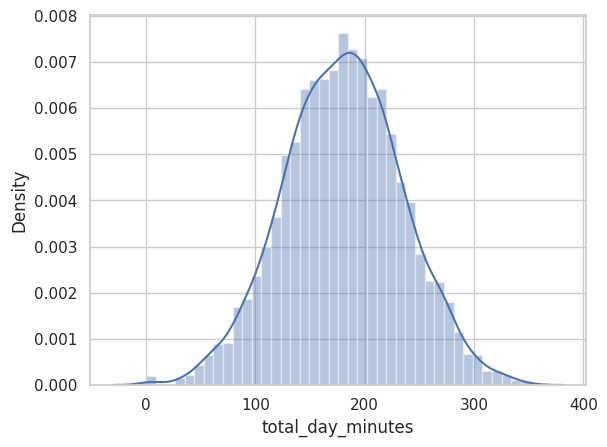

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


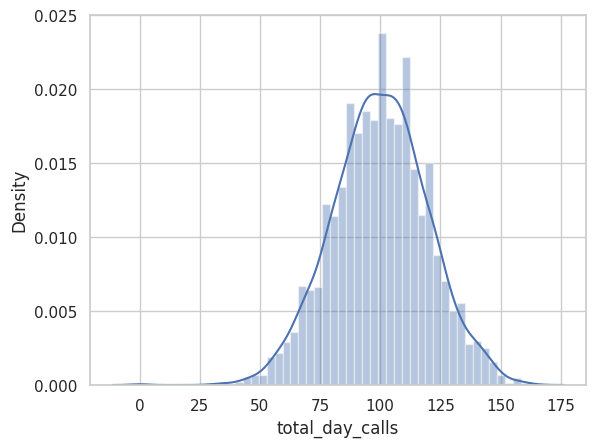

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


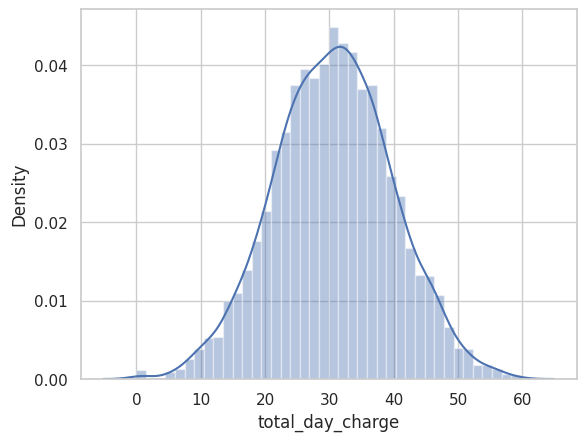

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


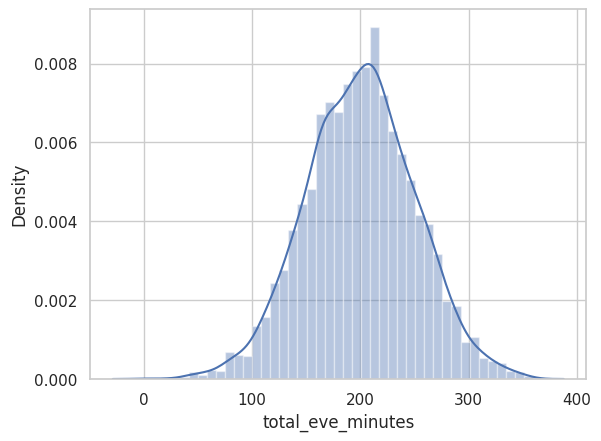

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


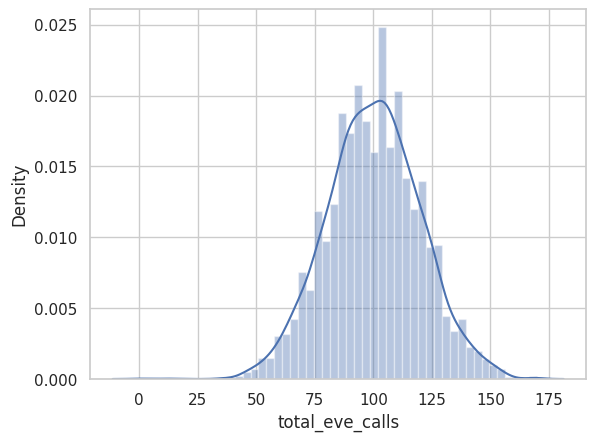

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


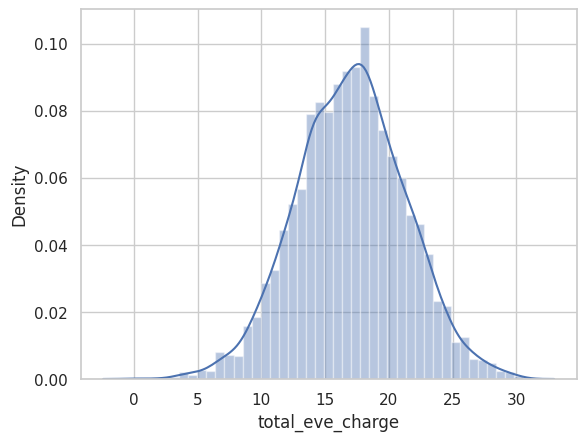

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


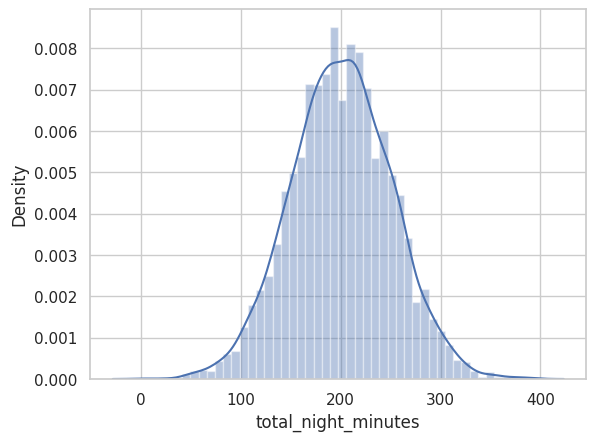

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


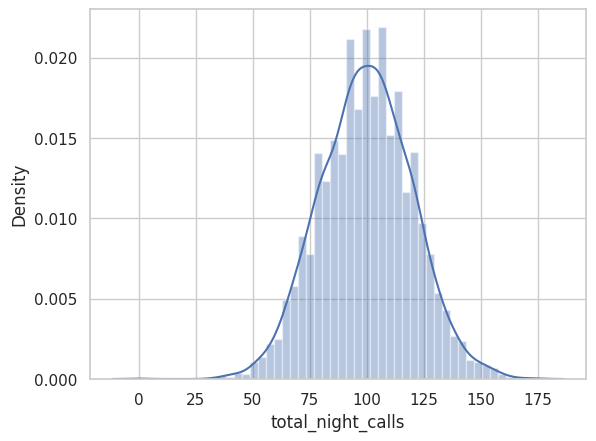

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


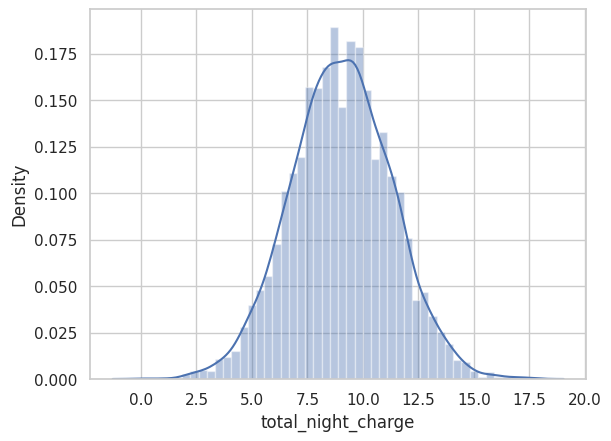

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


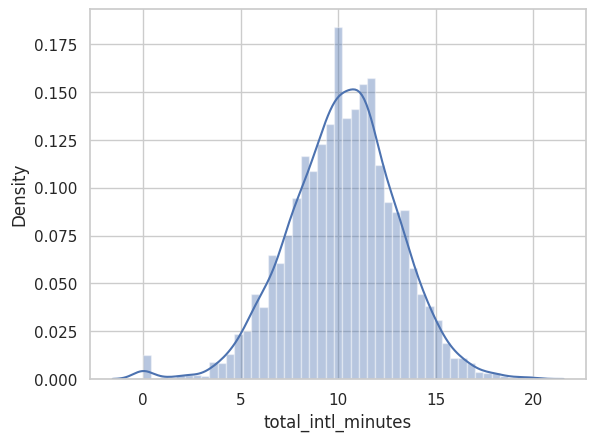

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


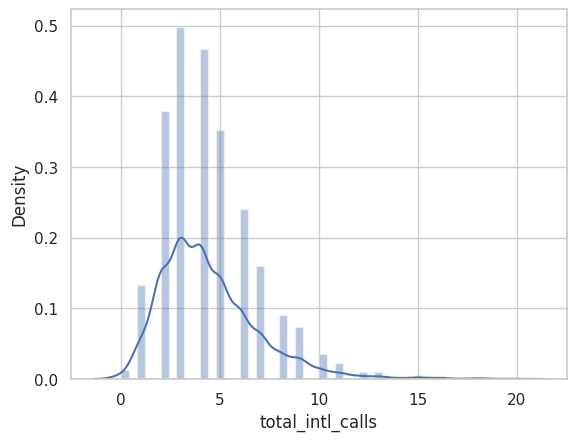

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


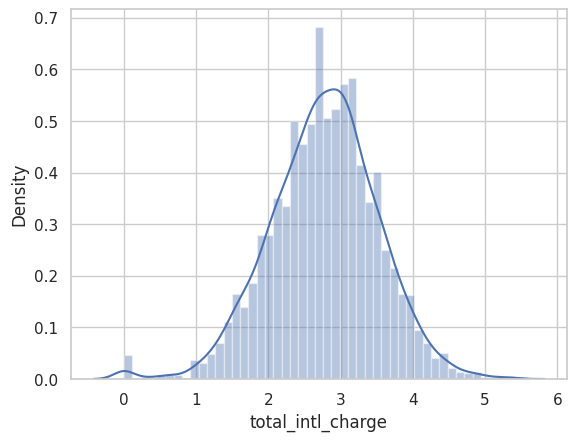

<ipython-input-18-fc4eb06e81bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


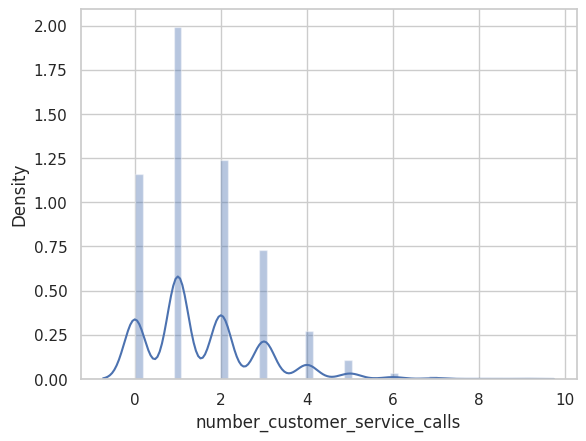

In [ ]:
# Density plot of all the numerical features
for feature in num_var:
    sns.distplot(train[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribuation.

so we can covert into normal distribution in featuer engineering step.
Other than the obove features all look like a normal distribuation.

## BiVariate Analysis

## 1. Countinous Features

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

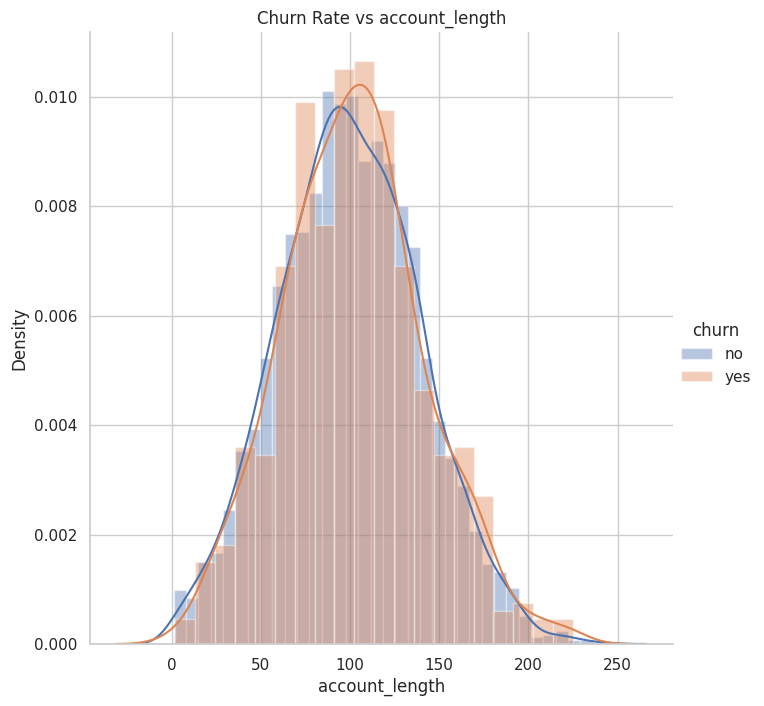

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

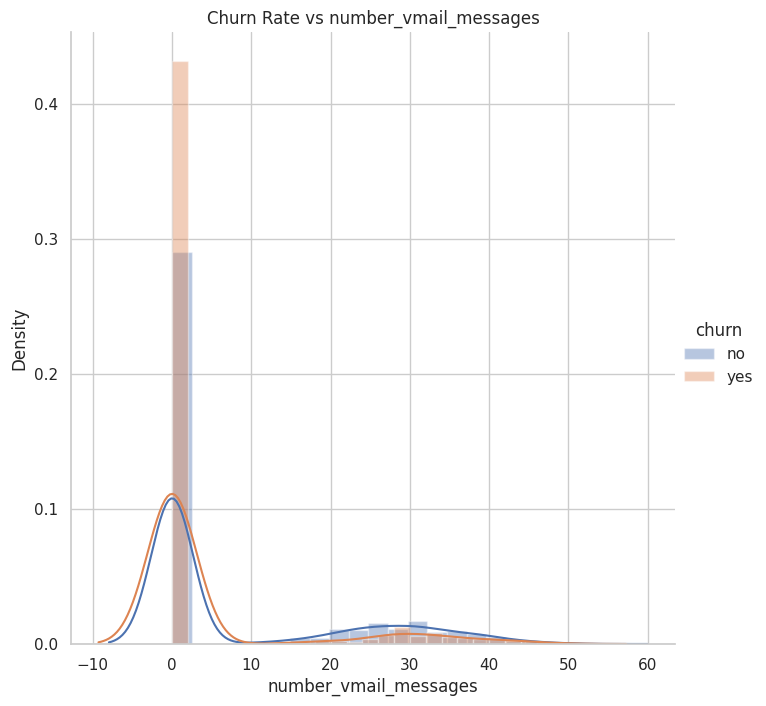

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

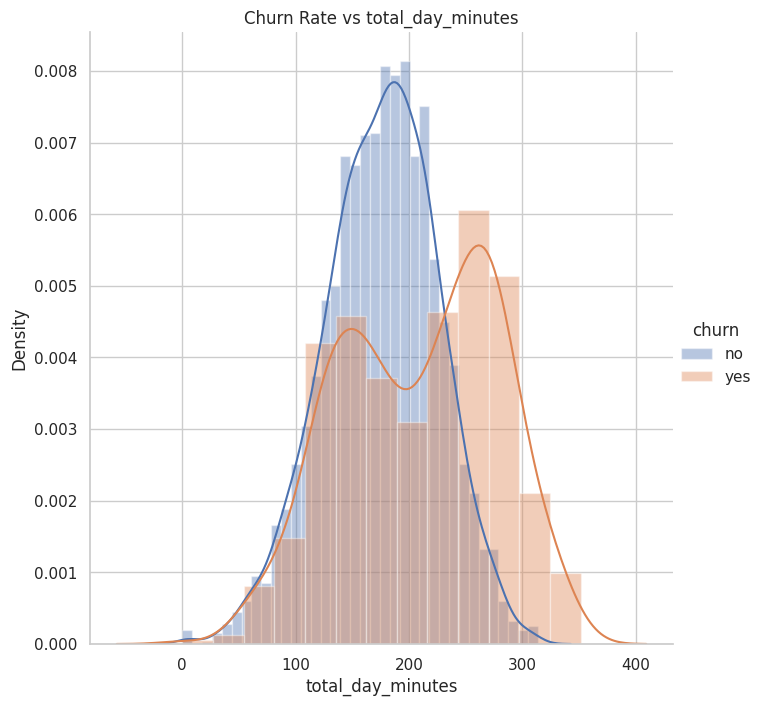

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

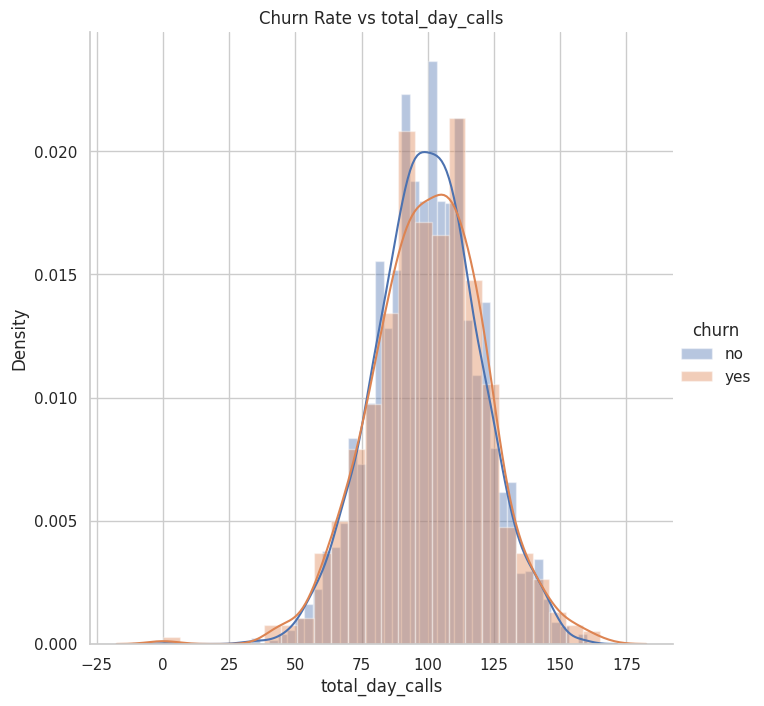

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

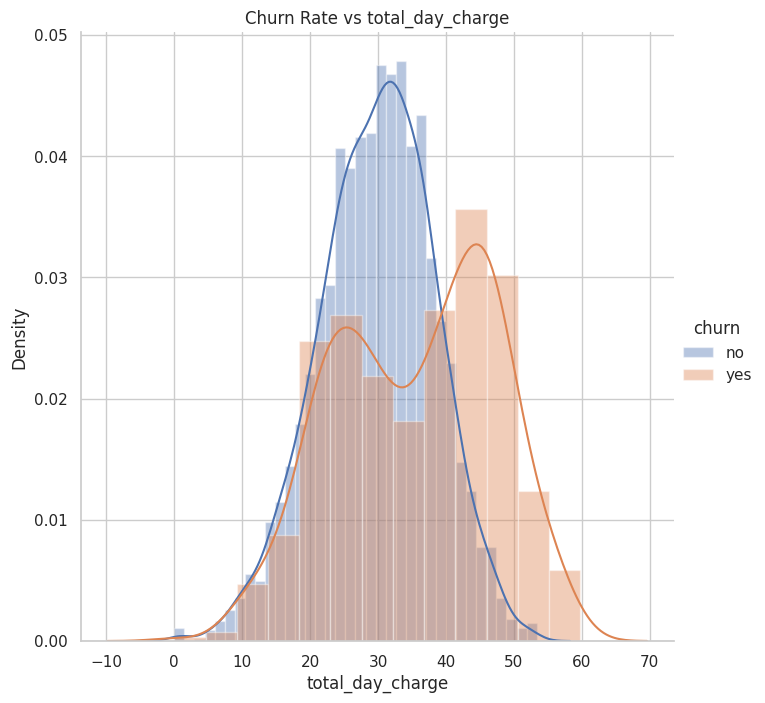

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

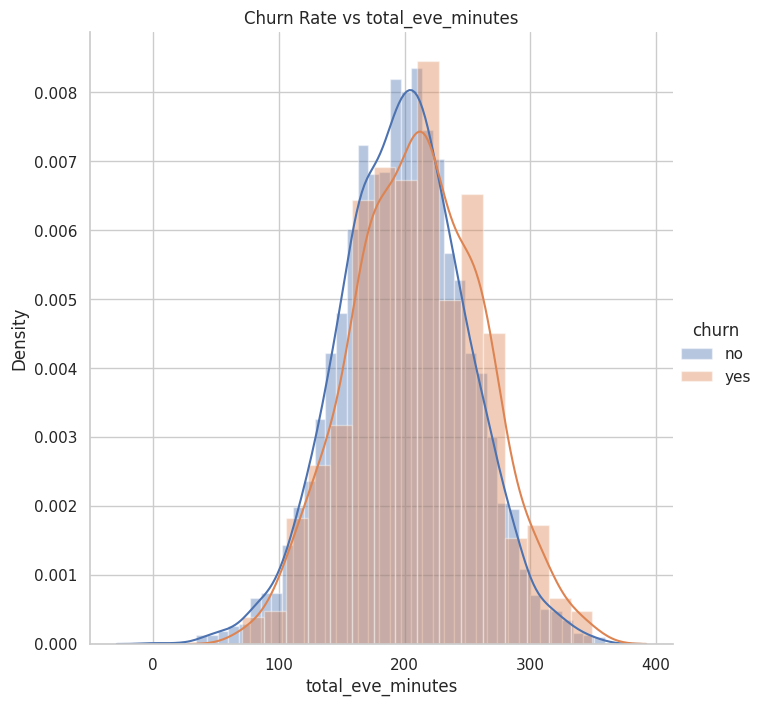

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

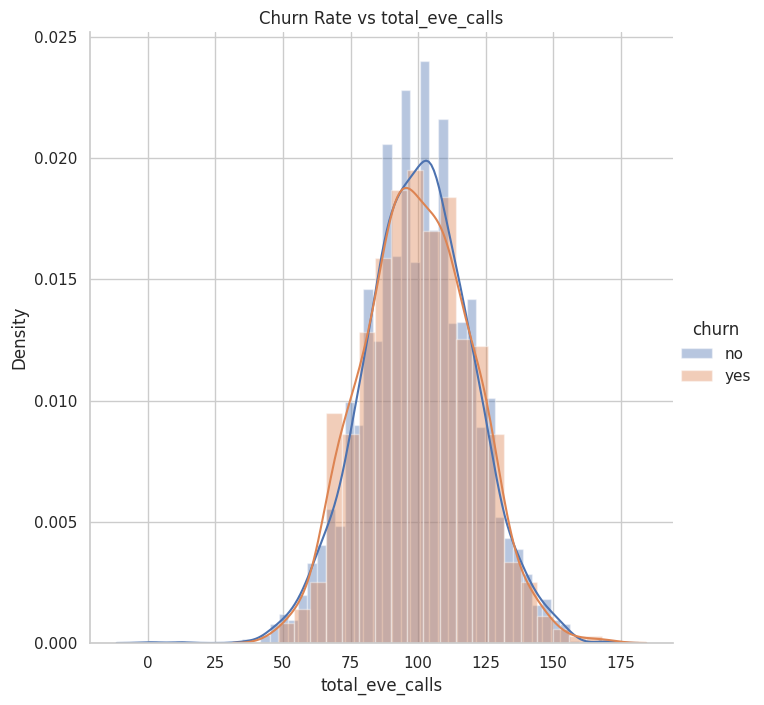

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

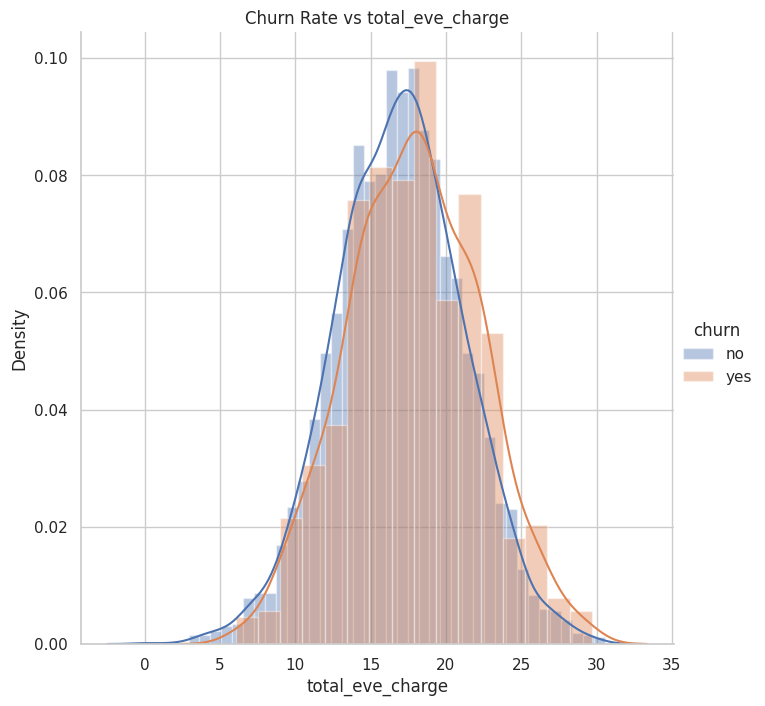

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

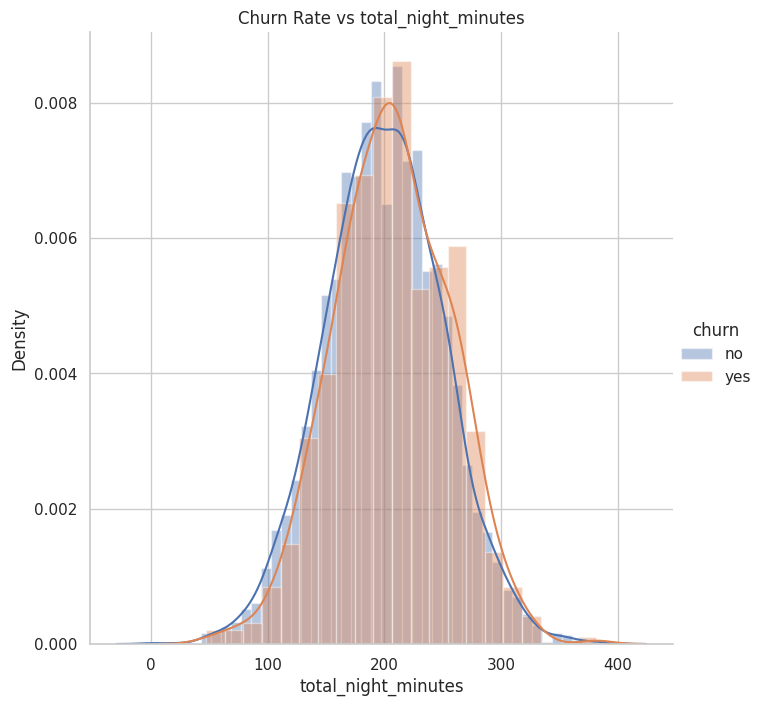

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

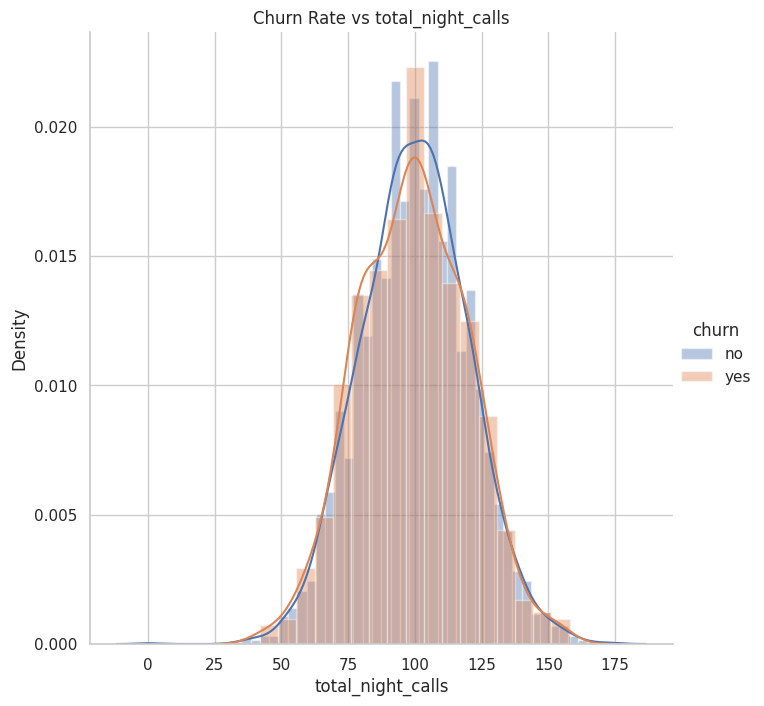

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

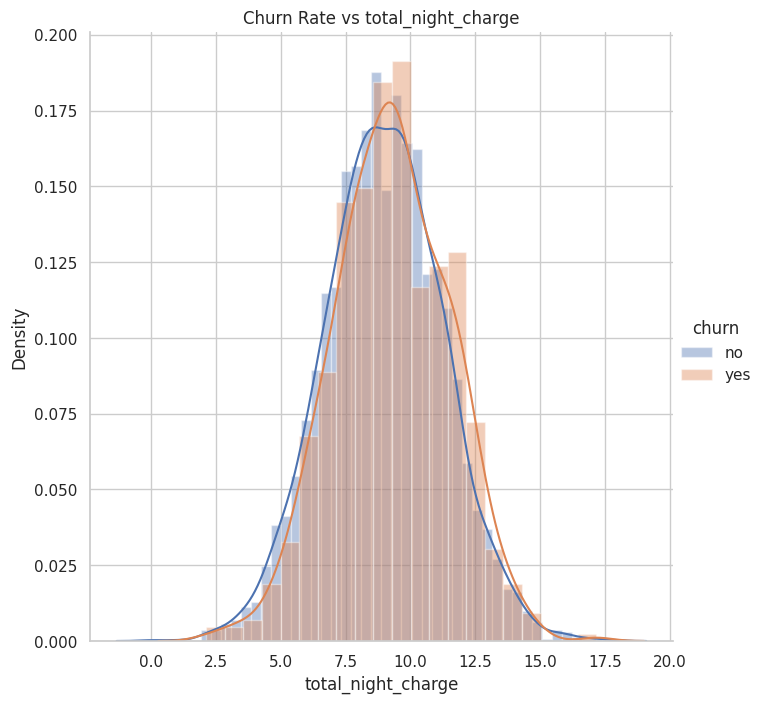

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

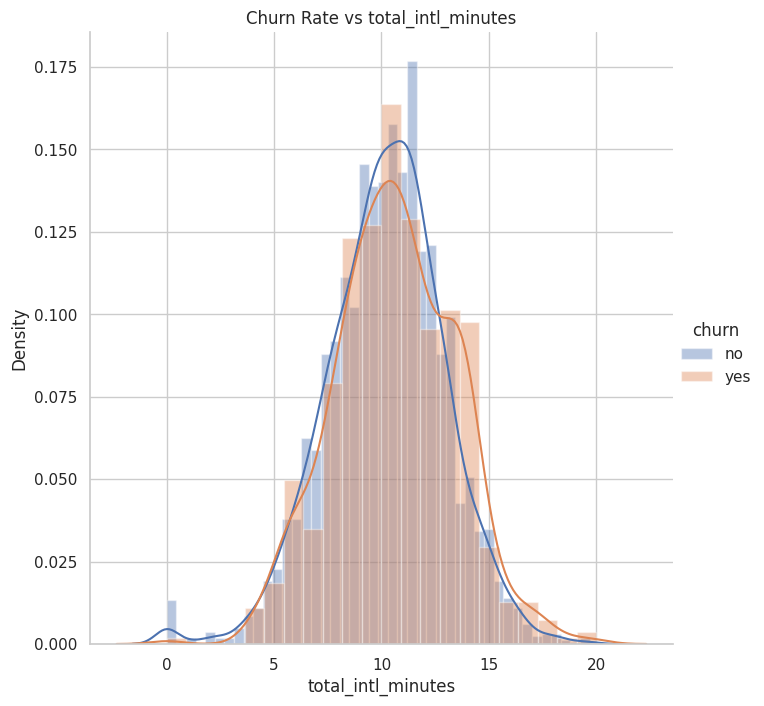

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

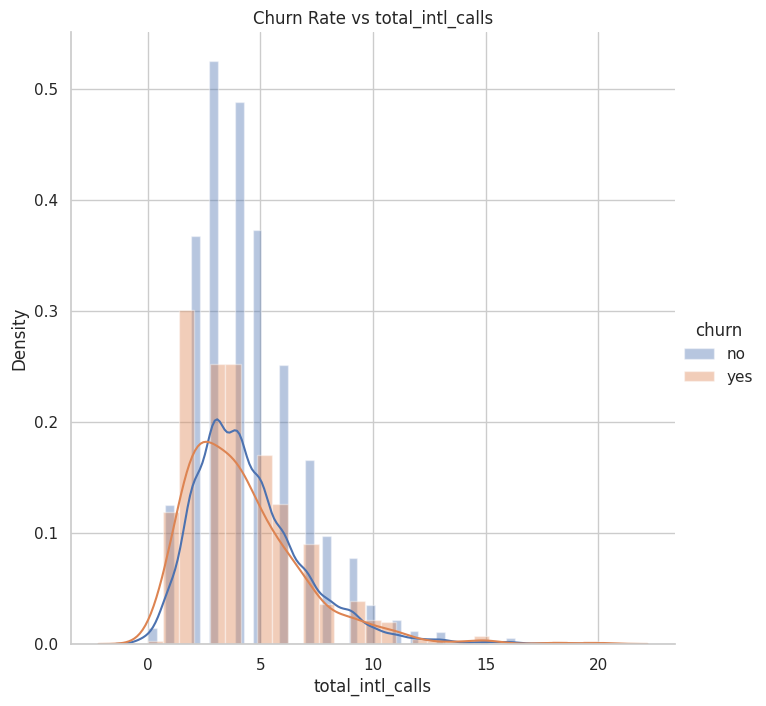

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

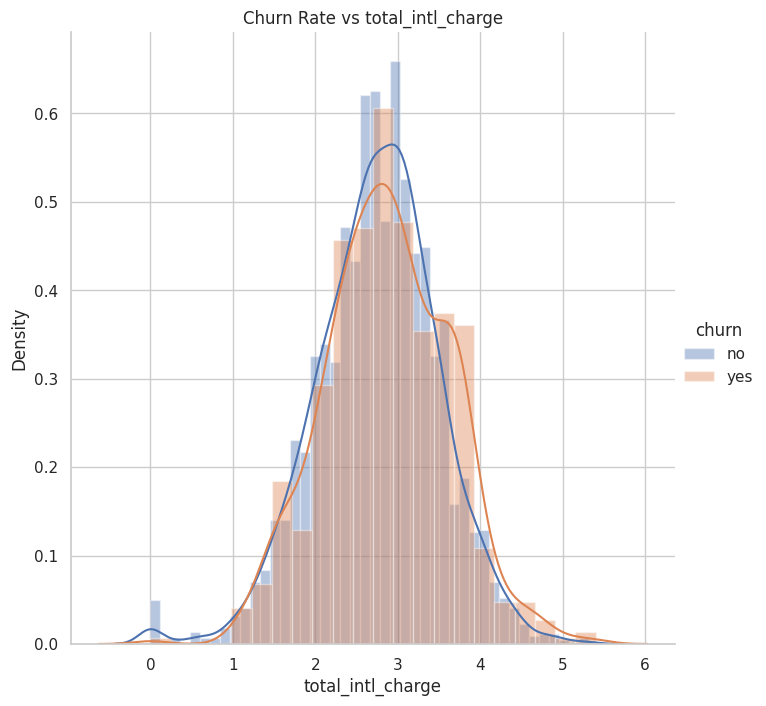

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1000x600 with 0 Axes>

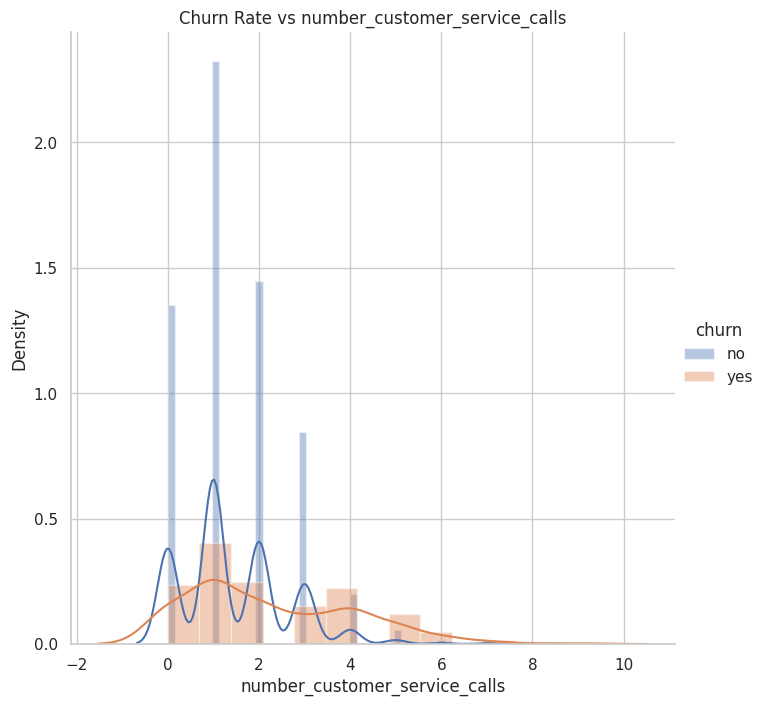

In [ ]:
#Exploring Numerical Feature Distributions in Relation to Churn Rate

def plot_feature_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    sns.FacetGrid(data, hue='churn', height=7).map(sns.distplot, feature).add_legend()
    plt.title(f'Churn Rate vs {feature}')
    plt.show()

# List of features to plot
features_to_plot = ['account_length', 'number_vmail_messages', 'total_day_minutes',
                    'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                    'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                    'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                    'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# Plotting for each feature
for feature in features_to_plot:
    plot_feature_distribution(train, feature)

### Observations:-
1> customers account length between 60 to 120 has more churn rate.

2> More churn rate when the number_vamil_messages is 0.

3> Churn rate is high when the total_day_minutes is lies between 210 min to 300 min.

4> churn rate is high lies between 85 to 115 related to total_day_Calls

5> churn rate is high when total day charge is lies between 40 to 50.

6> churn rate is high when the total evening minutes is lies between 180 min to 220 min.

7> churn rate is high when total evening calls lies between 90 to 115.

8> churn rate is high when the total evening charge is lies between 15 to 18.

9> Churn rate is high when the total_night_minutes is lies between 190 to 220 min.
10> churn rate is high when total_nigh_calls lies between 90 to 110..

11> churn rate is high when total_night_charge lies between 7.5 to 10.

12> churn rate is high when total international minutes lies between 9 to 12.
13> churn rate is high when total international calls is 1.
14> churn rate is high when total international charge is 2.5 to 3.

15> churn rate is high when number of customer service calls is 1.


###  Outlier Detection

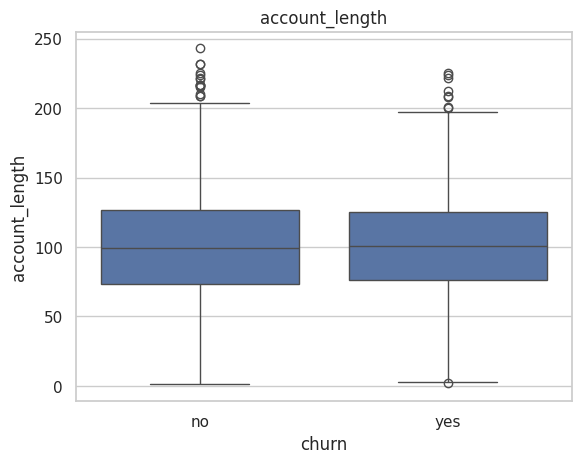

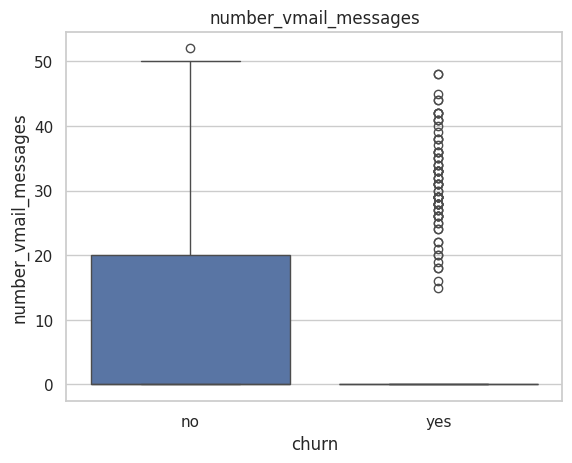

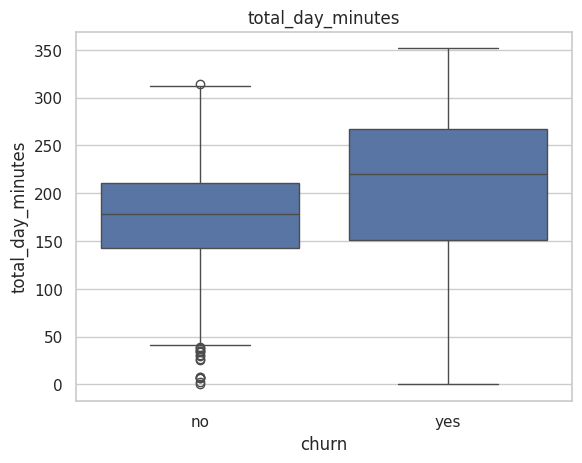

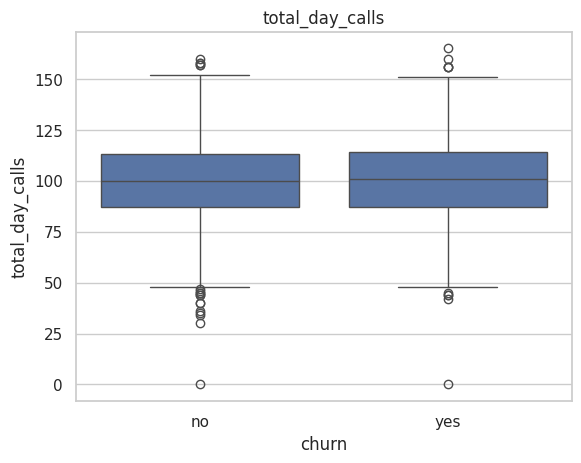

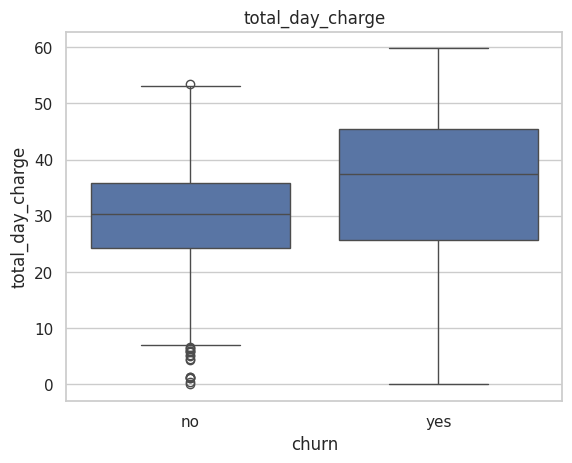

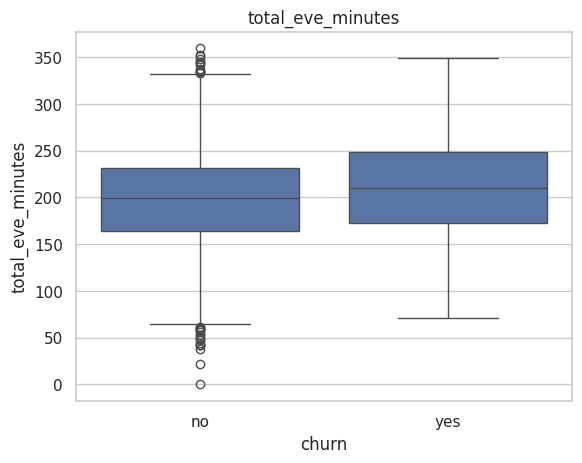

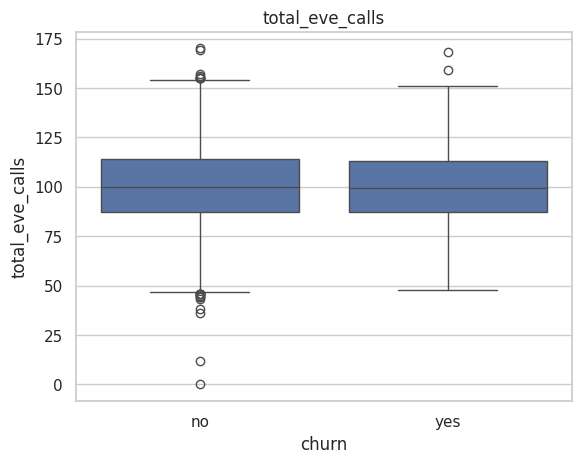

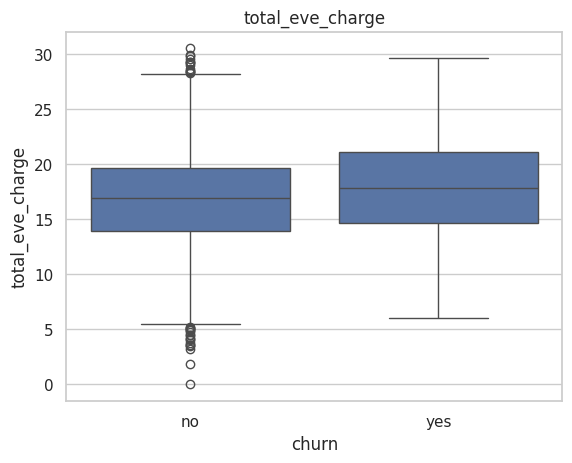

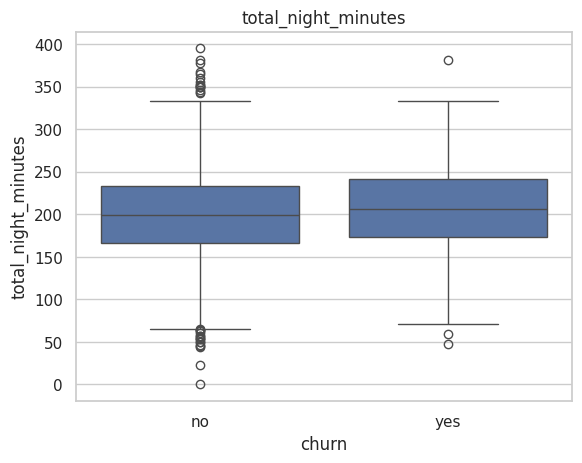

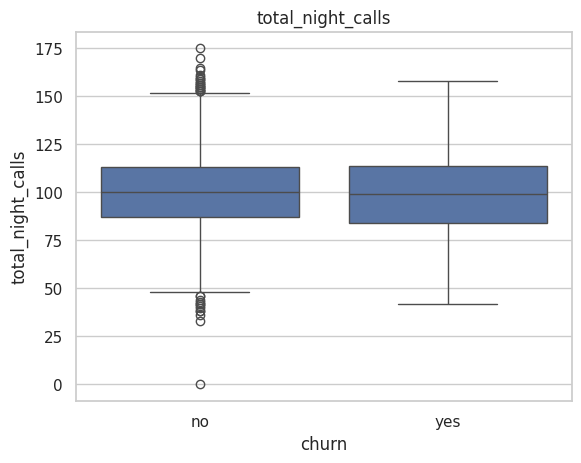

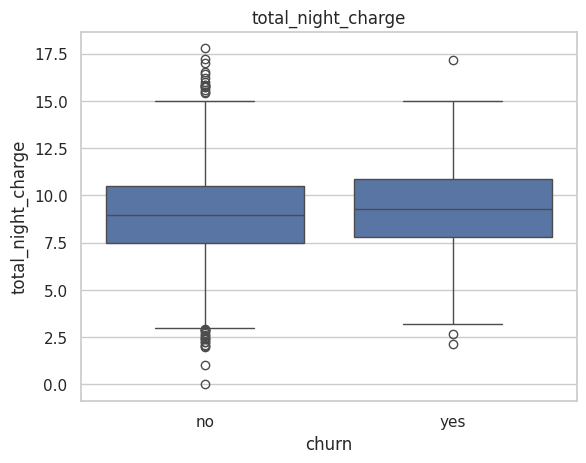

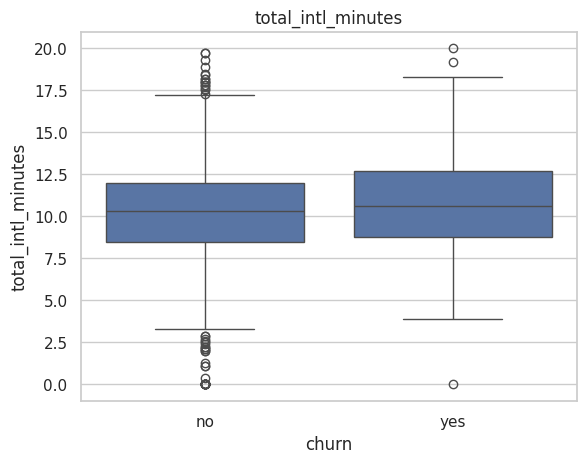

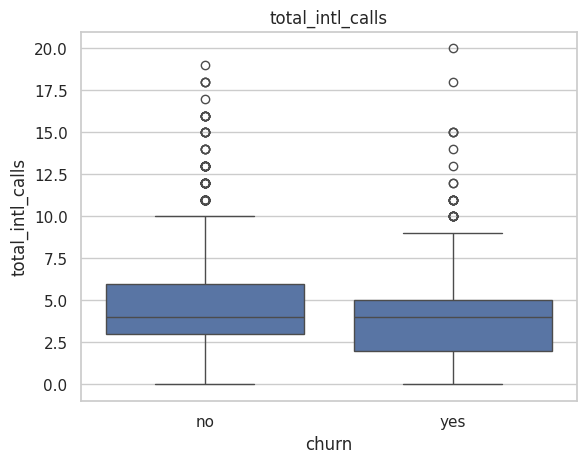

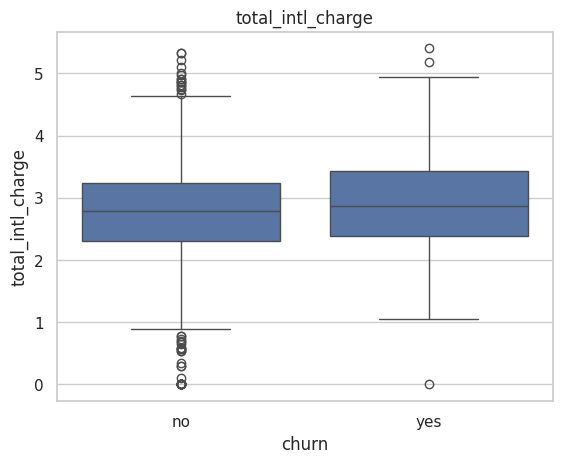

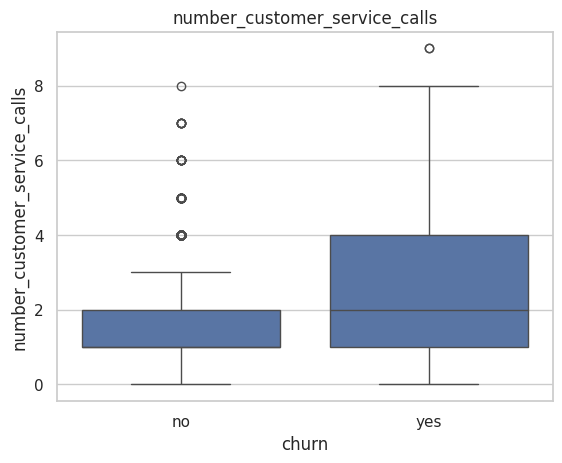

In [ ]:

for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

every features has a outliers so we need to remove the outliers.

outlies contains the some usefull information.

so we have to replace the outliers with some meaning full values.

so we should replace the outliers with meadin values

In [ ]:
# Removing the outliers

#functions for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return train

In [ ]:
train = remove_outliers(train, num_var)

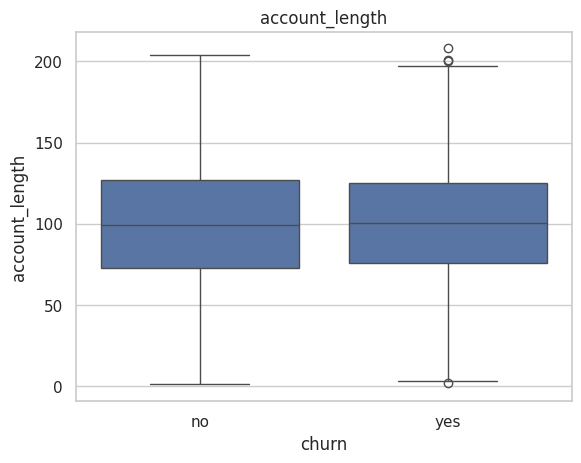

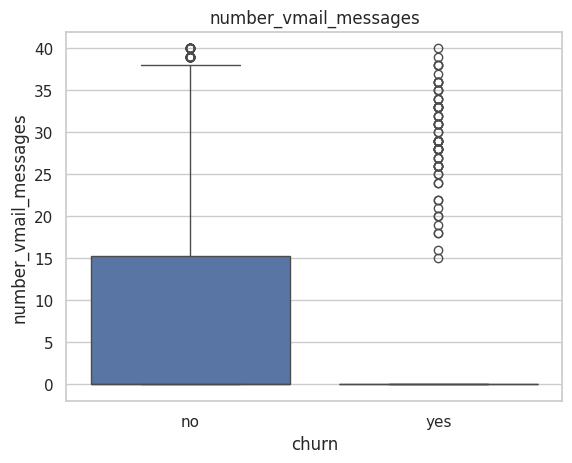

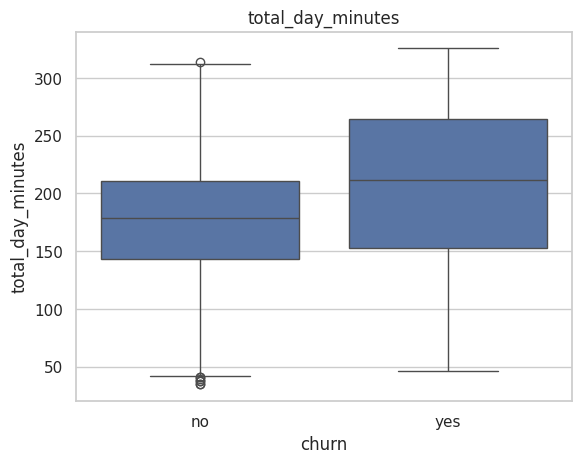

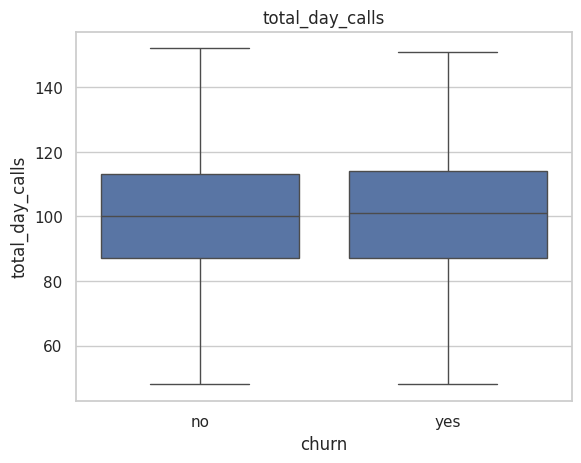

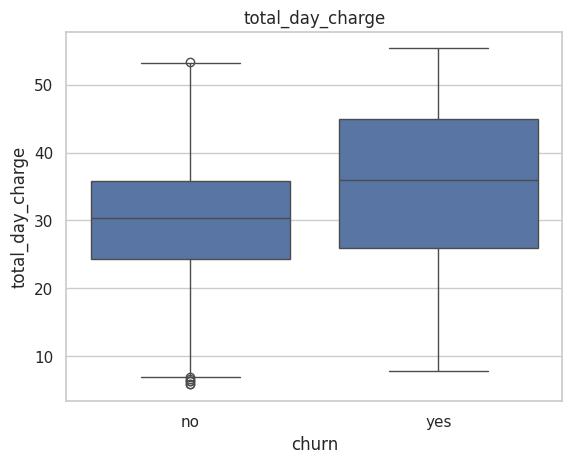

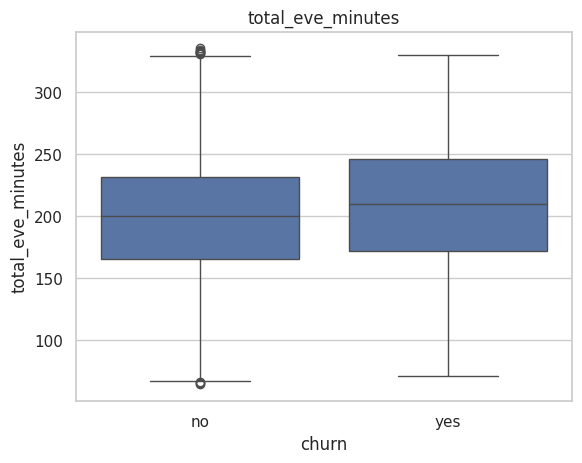

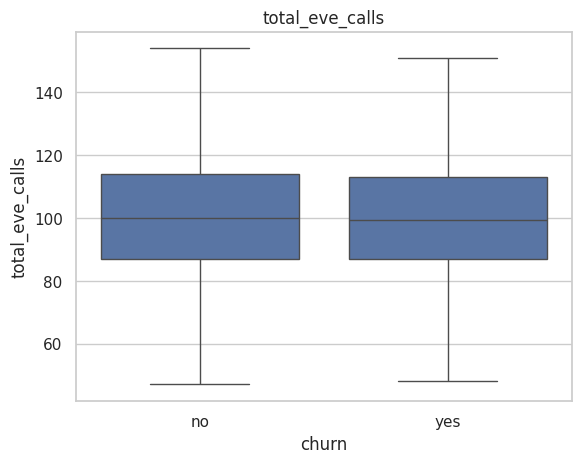

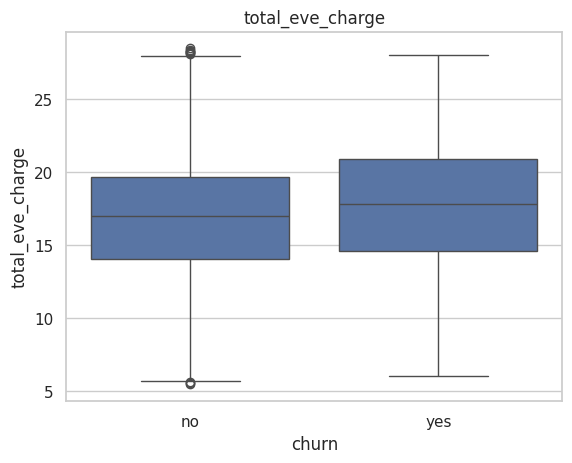

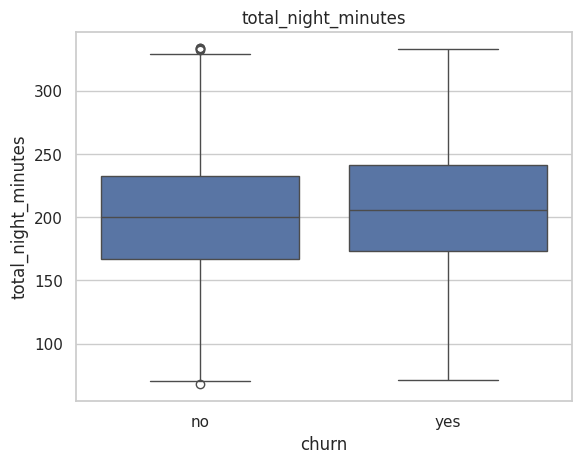

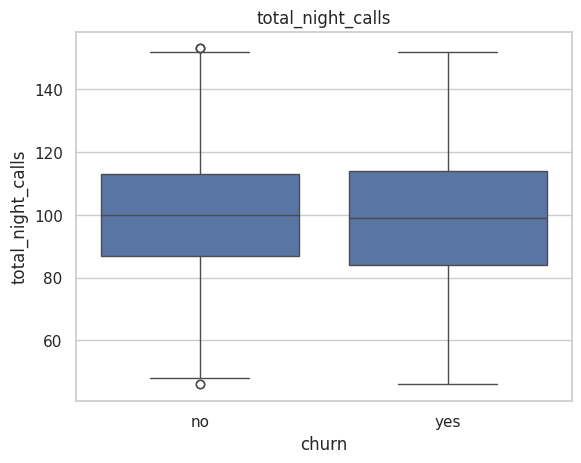

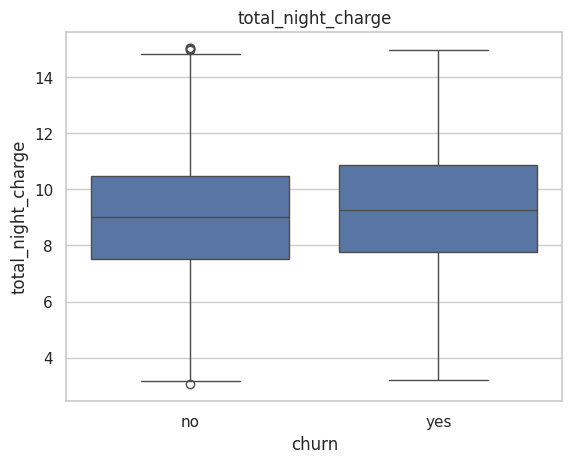

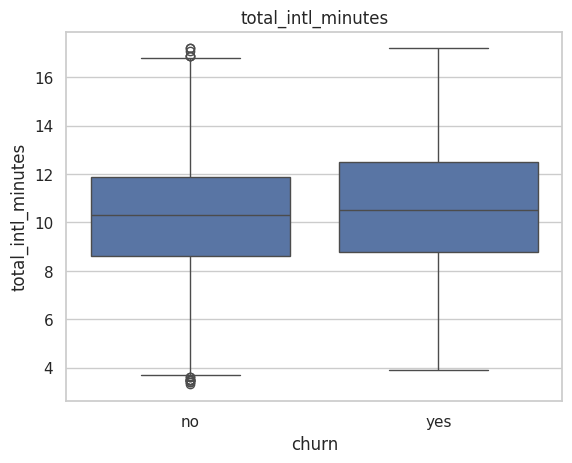

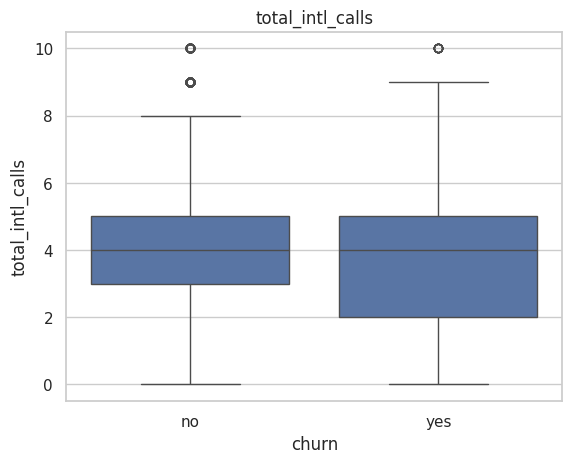

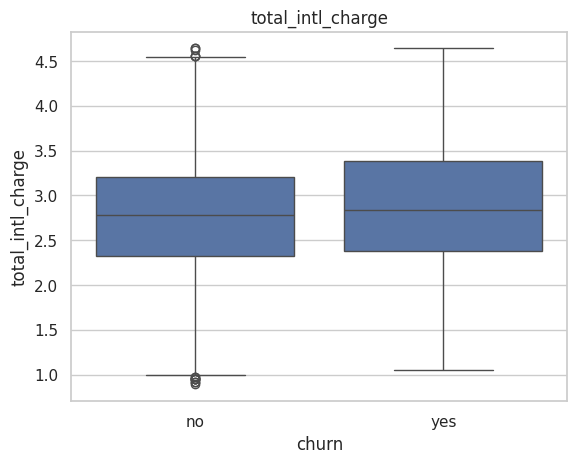

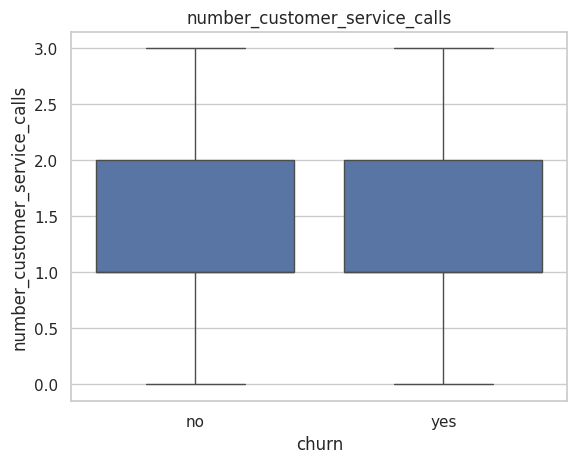

In [ ]:
# after removing the outliers we have to see the outliers
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

### Handling the Categorical Variable

state feature has 51 different category so we can't converted into onehot encoder that is it create 51 different features so it leads to overfitting so I will use the hashing encoding for state featuer.

In [ ]:
!pip install category_encoders
import category_encoders as ce
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(train)
test = hash_state.transform(test)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
# replace no to 0 and yes to 1
train.international_plan.replace(['no','yes'],[0,1],inplace = True)
train.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train.churn.replace(['no','yes'],[0,1],inplace = True)
test.international_plan.replace(['no','yes'],[0,1],inplace = True)
test.voice_mail_plan.replace(['no','yes'],[0,1],inplace = True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,0
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
train.area_code.value_counts()

area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64

In [ ]:
# here for area_code we can use onthotencoding as it has only 3 unique values.
# converting the area_code to numerical variable using one-hot encoder
from sklearn.preprocessing import OneHotEncoder

onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])


# Train
encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)

# Test
encoded_values = onehot_area.transform(test[['area_code']])
test[onehot_area.categories_[0]] = encoded_values.toarray()
test = test.drop('area_code', axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   col_0                          4250 non-null   int64  
 1   col_1                          4250 non-null   int64  
 2   col_2                          4250 non-null   int64  
 3   col_3                          4250 non-null   int64  
 4   col_4                          4250 non-null   int64  
 5   col_5                          4250 non-null   int64  
 6   col_6                          4250 non-null   int64  
 7   col_7                          4250 non-null   int64  
 8   account_length                 4250 non-null   int64  
 9   international_plan             4250 non-null   int64  
 10  voice_mail_plan                4250 non-null   int64  
 11  number_vmail_messages          4250 non-null   int64  
 12  total_day_minutes              4250 non-null   f

### Handling the Imbalanced dataset

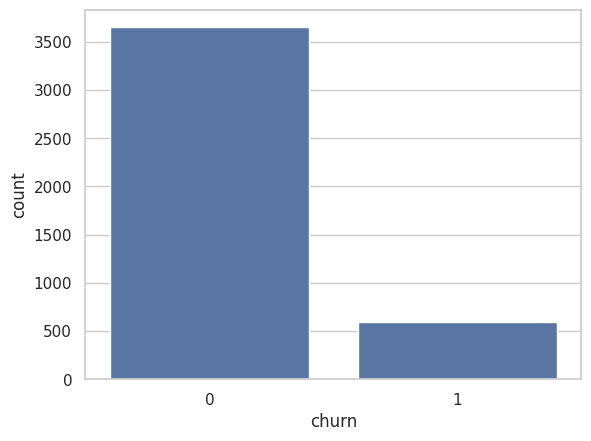

In [ ]:
# showing the imbalanced class
sns.countplot(x = 'churn', data = train)
plt.show()

In [ ]:
train.columns
columns_without_churn = train.drop('churn', axis=1).columns

In [ ]:
train

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,0,0,0,0,1,0,0,0,121,0,...,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,79,9.62,10.3,6,2.78,0,0,0.0,1.0,0.0
4246,0,0,0,0,0,0,1,0,73,0,...,89,8.38,11.5,6,3.11,3,0,1.0,0.0,0.0
4247,1,0,0,0,0,0,0,0,75,0,...,104,5.81,6.9,7,1.86,1,0,1.0,0.0,0.0
4248,0,0,0,0,0,0,1,0,50,0,...,116,13.39,9.9,5,2.67,2,0,1.0,0.0,0.0


0 represent the no churn and 1 represent the churn so there are huge difference in the class.

so we need to balanced the dataset
We have to use upsampling for handling the dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop('churn', axis=1), train['churn'], test_size=0.3, random_state=0)

print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
x_train

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
3897,0,0,0,1,0,0,0,0,87,0,...,184.7,50,8.31,14.7,6,3.97,1,0.0,1.0,0.0
1950,0,0,0,0,1,0,0,0,113,0,...,204.3,115,9.19,10.7,2,2.89,3,0.0,0.0,1.0
2600,0,1,0,0,0,0,0,0,75,0,...,235.4,116,10.59,8.5,5,2.30,0,0.0,1.0,0.0
264,0,0,1,0,0,0,0,0,119,0,...,147.6,76,6.64,7.6,3,2.05,3,0.0,1.0,0.0
385,0,0,0,0,1,0,0,0,91,0,...,280.5,89,12.62,5.9,2,1.59,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0,0,0,0,0,0,1,0,177,0,...,210.5,66,9.47,7.5,5,2.03,2,1.0,0.0,0.0
3264,0,0,1,0,0,0,0,0,49,0,...,206.8,88,9.31,7.4,3,2.00,2,0.0,0.0,1.0
1653,0,0,0,0,0,0,0,1,126,1,...,154.5,102,6.95,9.6,7,2.59,1,0.0,1.0,0.0
2607,0,0,0,0,0,0,0,1,82,0,...,118.3,91,5.32,10.3,4,2.78,0,0.0,1.0,0.0


In [ ]:
y_train

3897    0
1950    1
2600    1
264     0
385     0
       ..
1033    0
3264    0
1653    0
2607    0
2732    0
Name: churn, Length: 2975, dtype: int64

In [ ]:
# perform the sampling to get the balanced data.
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


In [ ]:
train_col = x_train.columns

test_col = x_test.columns

### Scalling the dataset

In [ ]:
 #. we use minmax scaller for this task.
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train, x_test, and test are already defined with the original columns
original_columns = train_col

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
# test = scaler.transform(test)

# Convert the scaled data back to DataFrames with the original column names
x_train_s_scaled_df = pd.DataFrame(x_train, columns=train_col)
x_test_scaled_df = pd.DataFrame(x_test, columns=test_col)
# test_scaled_df = pd.DataFrame(test_sc, columns=x_train.columns)

# Combine the training data and target variables into one DataFrame
train_combined_df = pd.concat([x_train_s_scaled_df, pd.Series(y_train_s, name='churn')], axis=1)

# Combine the test data and target variables into one DataFrame
test_combined_df = pd.concat([x_test_scaled_df, pd.Series(y_test, name='churn')], axis=1)

# Optionally, add an identifier column for test dataset rows
# test_combined_df['id'] = id_submission

# Combine train, test, and the test submission data into one DataFrame
pretrained_data_df = pd.concat([train_combined_df, test_combined_df], ignore_index=True)

# Save the combined DataFrame to CSV
pretrained_data_df.to_csv('pretrained_data.csv', index=False)


In [ ]:
# now we are ready to go for model building.

In [ ]:
x_train.shape

(2975, 28)

In [ ]:
x_test.shape

(1275, 28)

## Building the model

### First we try automate approach uisng lazypredict
##### LazyPredict is a Python library that simplifies the initial stages of the machine learning process by providing
a quick and easy way to build and compare several machine learning models. It automates the model selection and evaluation process,
allowing users to get a sense of the performance of various algorithms on their dataset without the need for extensive manual configuration.

#### Here's how it works:

Automatic Model Selection: LazyPredict automatically selects a wide range of machine learning algorithms suitable for both classification and regression tasks.

Efficient Evaluation: It trains each selected model on the dataset and evaluates its performance using default evaluation metrics. This provides a quick overview of how different algorithms perform on the given data.

Ranking and Comparison: LazyPredict ranks the models based on their performance metrics, making it easy to identify the top-performing algorithms for further analysis and tuning.

[6]
5s


In [ ]:
!pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyClassifier

import lightgbm as lgb

In [ ]:
# Create LazyClassifier instance
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit LazyClassifier
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

# Add 'Model' column with model names
models['Model'] = models.index

# Store results into a CSV file
models.to_csv('lazy_classifier_results.csv', index=False)
models

 21%|██        | 6/29 [00:04<00:14,  1.63it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 69%|██████▉   | 20/29 [00:09<00:01,  4.83it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [00:12<00:01,  1.92it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'



 97%|█████████▋| 28/29 [00:19<00:01,  1.64s/it]

[LightGBM] [Info] Number of positive: 425, number of negative: 2550
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2372
[LightGBM] [Info] Number of data points in the train set: 2975, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142857 -> initscore=-1.791759
[LightGBM] [Info] Start training from score -1.791759


100%|██████████| 29/29 [00:20<00:00,  1.44it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,Model
Model,,,,,,
XGBClassifier,0.93,0.78,0.78,0.93,6.87,XGBClassifier
LGBMClassifier,0.93,0.77,0.77,0.93,0.50,LGBMClassifier
BaggingClassifier,0.92,0.75,0.75,0.91,0.49,BaggingClassifier
RandomForestClassifier,0.93,0.74,0.74,0.92,1.54,RandomForestClassifier
DecisionTreeClassifier,0.87,0.73,0.73,0.87,0.19,DecisionTreeClassifier
GaussianNB,0.85,0.70,0.70,0.85,0.08,GaussianNB
ExtraTreesClassifier,0.91,0.68,0.68,0.89,0.87,ExtraTreesClassifier
NearestCentroid,0.70,0.67,0.67,0.75,0.07,NearestCentroid
Perceptron,0.88,0.65,0.65,0.86,0.10,Perceptron


In [ ]:
models.index

Index(['XGBClassifier', 'LGBMClassifier', 'BaggingClassifier',
       'RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB',
       'ExtraTreesClassifier', 'NearestCentroid', 'Perceptron',
       'AdaBoostClassifier', 'SVC', 'ExtraTreeClassifier',
       'PassiveAggressiveClassifier', 'LinearDiscriminantAnalysis',
       'LabelSpreading', 'LabelPropagation', 'SGDClassifier',
       'LogisticRegression', 'BernoulliNB', 'CalibratedClassifierCV',
       'KNeighborsClassifier', 'LinearSVC', 'QuadraticDiscriminantAnalysis',
       'RidgeClassifier', 'RidgeClassifierCV', 'DummyClassifier'],
      dtype='object', name='Model')

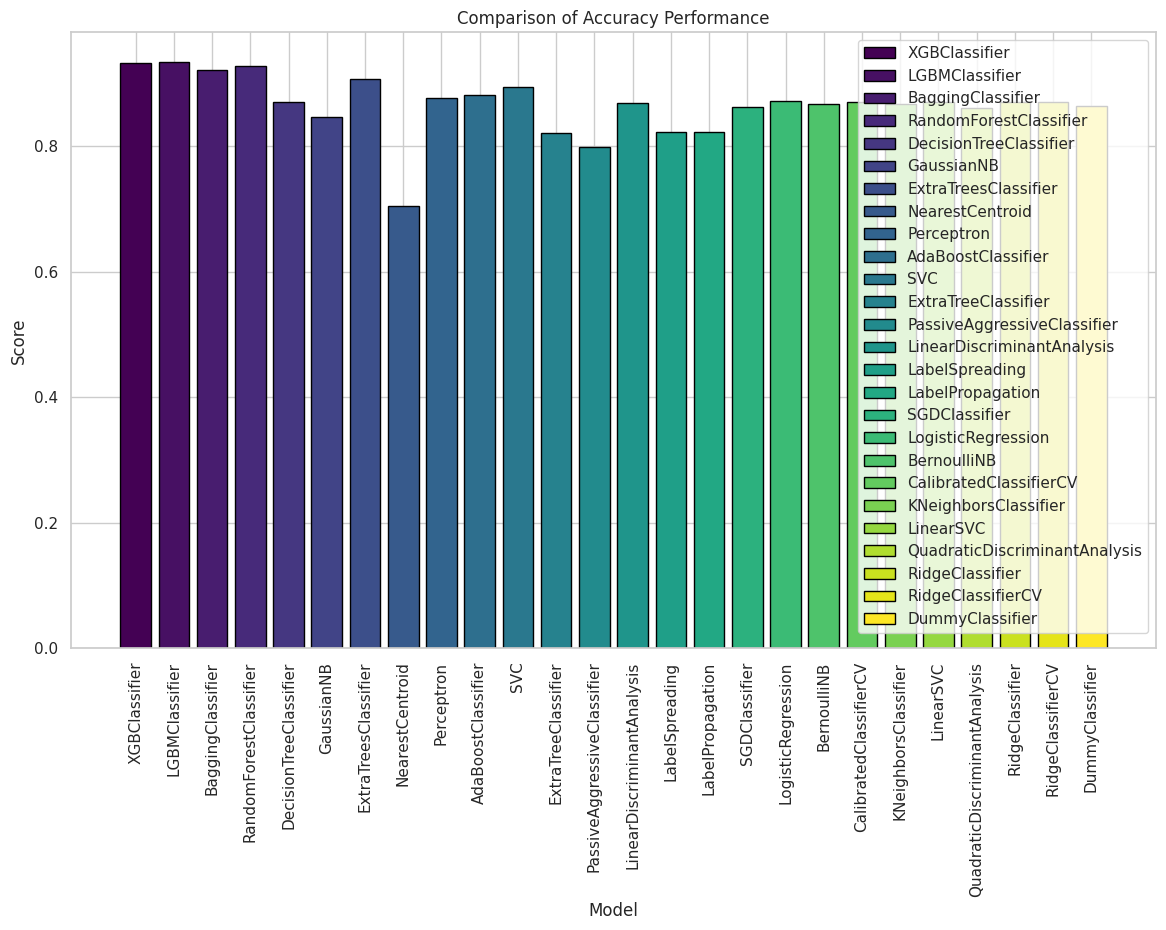

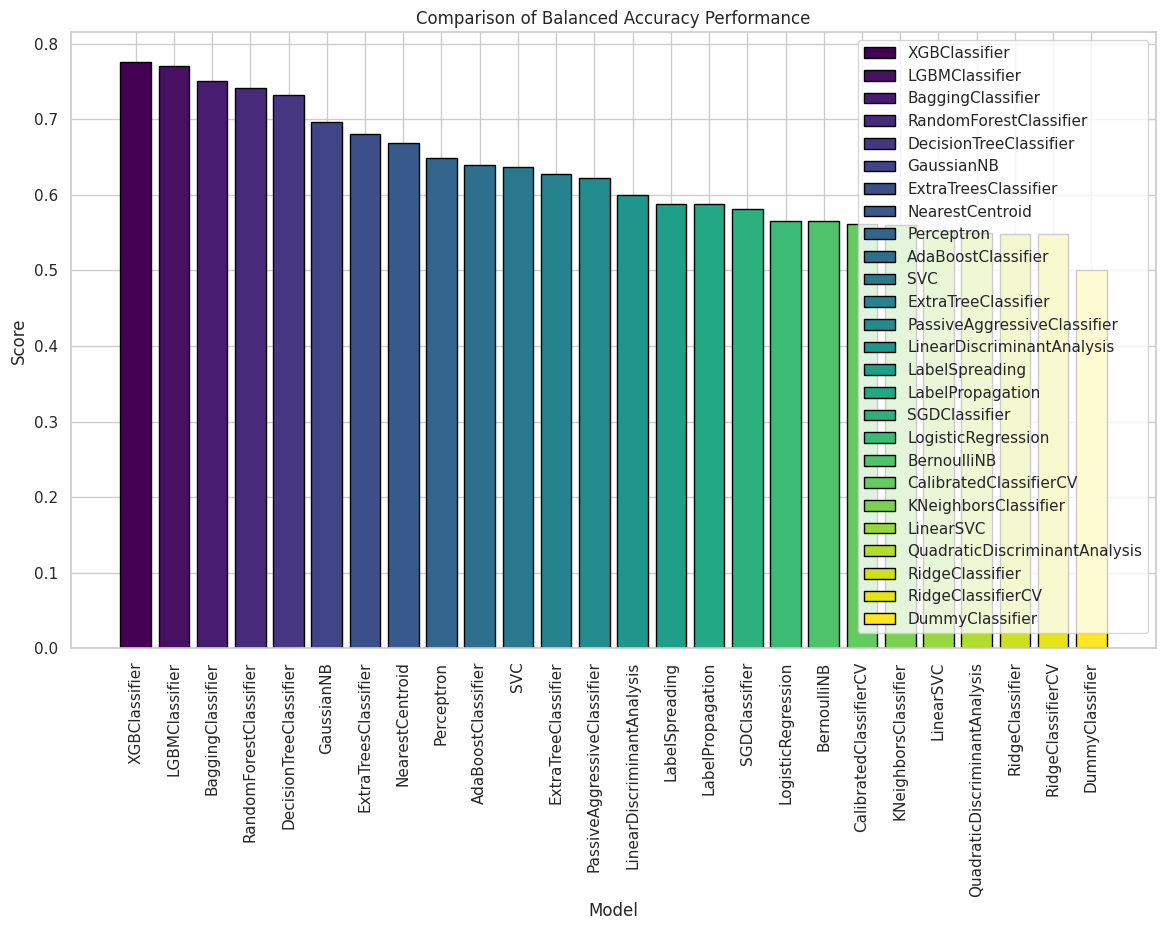

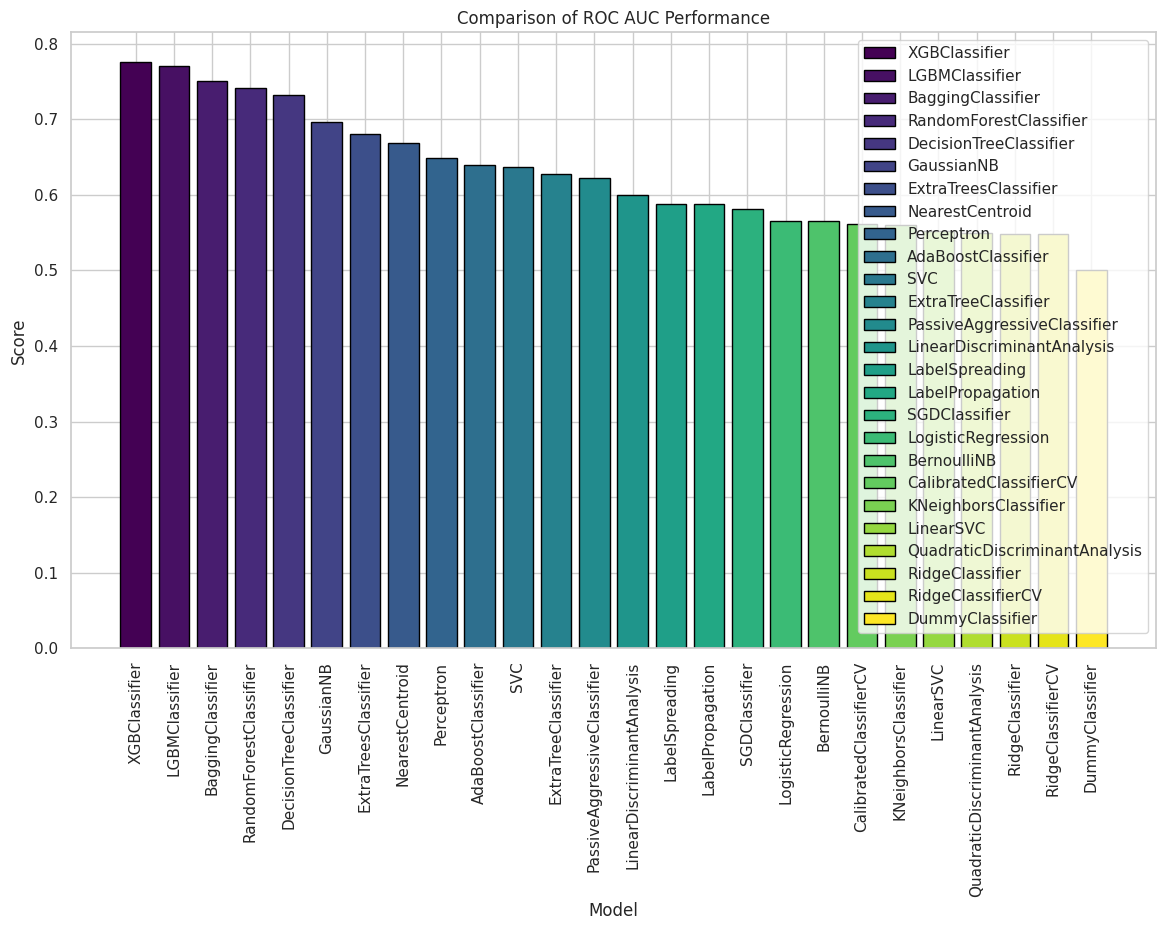

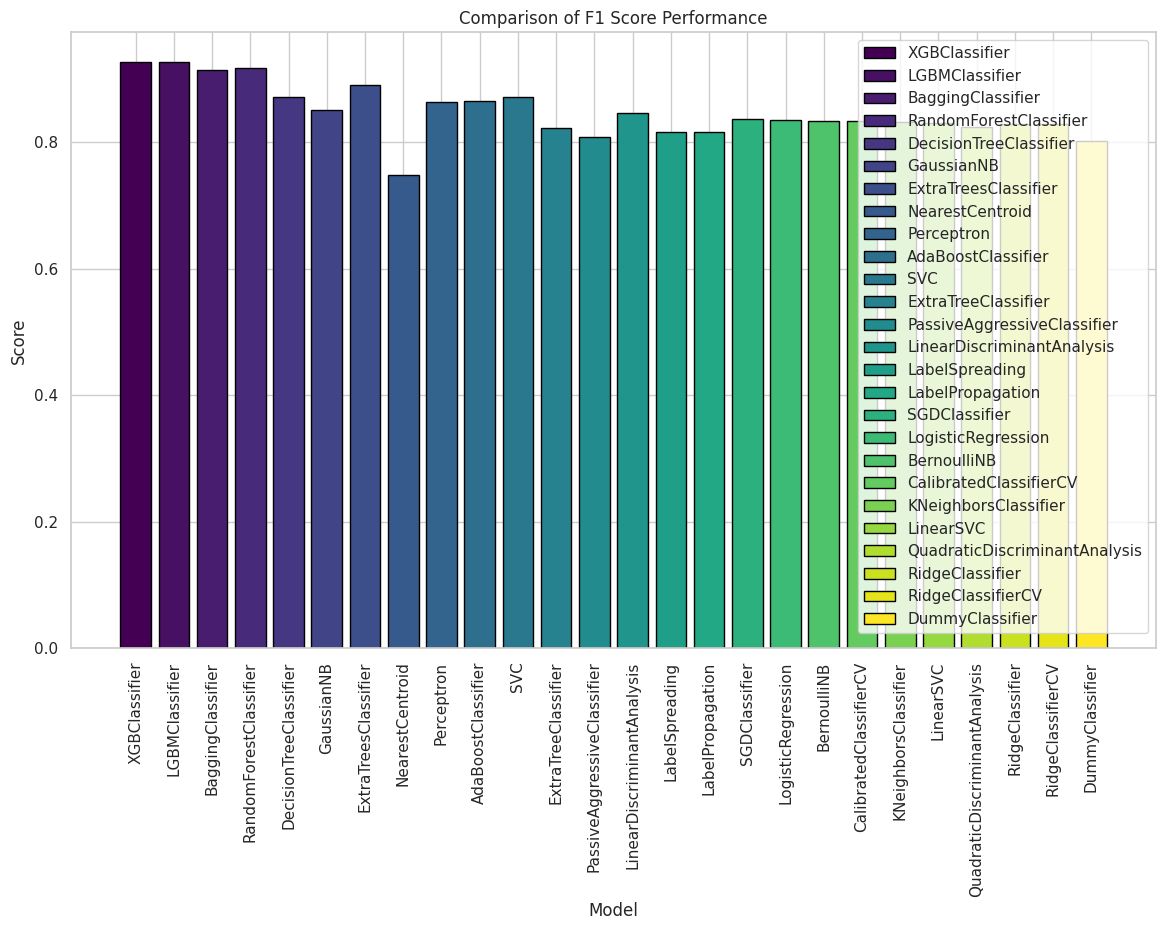

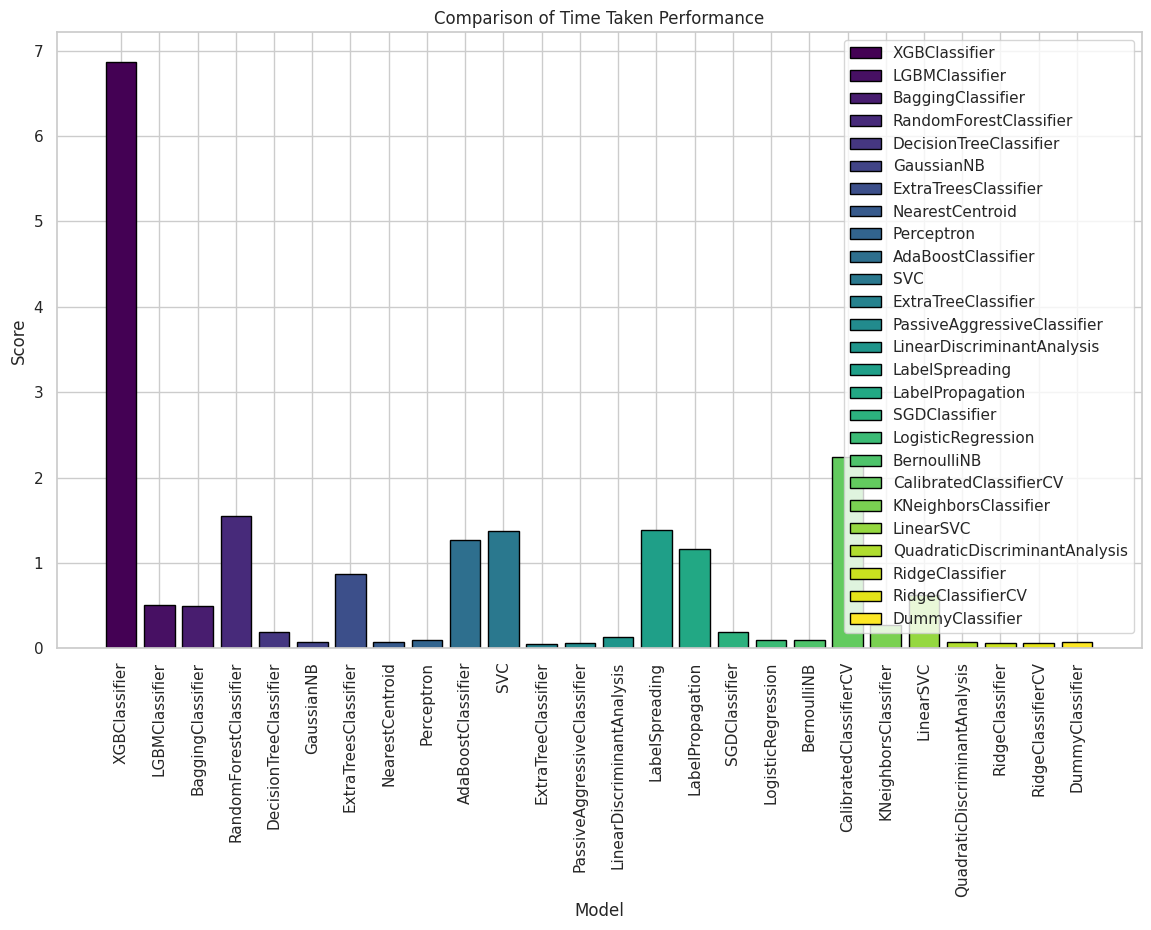

In [ ]:
# Load the CSV file
try:
    results = pd.read_csv('lazy_classifier_results.csv')

    # Get list of all features except 'Model'
    features = results.columns.tolist()
    if 'Model' in features:
        features.remove('Model')

    # Define color palette for models
    num_models = len(results)
    color_palette = plt.cm.viridis(np.linspace(0, 1, num_models))

    # Plotting individual graphs for each feature
    for feature in features:
        plt.figure(figsize=(14, 8))
        for i, model in enumerate(results['Model']):
            plt.bar(model, results.loc[i, feature], color=color_palette[i], edgecolor='black', label=model)
        plt.title(f'Comparison of {feature} Performance')
        plt.ylabel('Score')
        plt.xlabel('Model')
        plt.xticks(rotation=90)
        plt.legend(loc='upper right')
        plt.show()

except FileNotFoundError:
    print("The CSV file 'lazy_classifier_results.csv' was not found.")

## To conclude,
 the results and determine the best models to go for, let's consider all factors (Accuracy, Balanced Accuracy, ROC AUC, F1 Score, and Time Taken) collectively. We can calculate the average score for each model across these factors and then compare them.

 Here's how we can do it:

1> Calculate the average score for each model.

2> Determine the two models with the highest average scores.

In [ ]:
# This code will calculate the average score for each model based on Accuracy, Balanced Accuracy, ROC AUC, and F1 Score, and then identify the two models with the highest average scores.

import pandas as pd

# Load the results
results = pd.read_csv('lazy_classifier_results.csv')

# Calculate average score for each model
results['Average Score'] = results[['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score']].mean(axis=1)

# Determine the two models with the highest average scores
top_models = results.nlargest(3, 'Average Score')

print("Top 3 Models:")
print(top_models[['Model', 'Average Score']])

Top 3 Models:
               Model  Average Score
0      XGBClassifier           0.85
1     LGBMClassifier           0.85
2  BaggingClassifier           0.83


Based on the average score across all factors, the top 3 models are:

XGBClassifier with an average score of 0.85

LGBMClassifier with an average score of 0.85

BaggingClassifier with an average score of 0.83

These models have demonstrated the best overall performance across multiple evaluation metrics, making them the top choices for consideration

### Exploring Performance with Artificial Neural Networks (ANN): Let's Try an ANN Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
import numpy as np

# Define the ANN model with sigmoid activation function in the output layer
ann_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)

# Train the ANN model
ann_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ann_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Performance Metrics for ANN Model with Sigmoid Output Activation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")


Performance Metrics for ANN Model with Sigmoid Output Activation:
Accuracy: 0.90
Balanced Accuracy: 0.70
ROC AUC: 0.70
F1 Score: 0.54


In [ ]:
# We can see that USiung ANN we can not get better acccuray.

In conclusion:-

Based on the average score across all factors, the top 3 models for this dataset are:-

XGBClassifier with an average score of 0.85

LGBMClassifier with an average score of 0.85

BaggingClassifier with an average score of 0.83

These models have demonstrated the best overall performance across multiple evaluation metrics, making them the top choices for consideration

# Let's check the feature Importance for this three models.
## We will store the result into csv file and in another project we can use thta csv file to work only on most important features.
so that we can remove unwanted features and get better accuracy and time result.

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np

# Initialize models
models = {
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'BaggingClassifier': BaggingClassifier()
}

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Get feature importances
    if model_name == 'BaggingClassifier':
        # For BaggingClassifier, calculate mean feature importance across all base estimators
        importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
    else:
        # For other models, directly retrieve feature importances
        importances = model.feature_importances_

    # Normalize importance scores between 0 and 1
    normalized_importances = (importances - importances.min()) / (importances.max() - importances.min())

    # Multiply normalized importance scores by 100
    normalized_importances *= 100

    # Create DataFrame for feature importance results
    df = pd.DataFrame({'Feature': columns_without_churn, 'Importance': normalized_importances})
    df['Model'] = model_name  # Add model name column

    # Append DataFrame to list
    dfs.append(df)

# Concatenate all DataFrames into one
feature_importance_df = pd.concat(dfs, ignore_index=True)

# Save DataFrame to CSV
feature_importance_df.to_csv('feature_importance_results_normalized.csv', index=False)


[LightGBM] [Info] Number of positive: 425, number of negative: 2550
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2353
[LightGBM] [Info] Number of data points in the train set: 2975, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142857 -> initscore=-1.791759
[LightGBM] [Info] Start training from score -1.791759


In [ ]:
# lets anaylze this important features, so that we can eliminate unwanted features.
temp = pd.read_csv("feature_importance_results_normalized.csv")
temp.describe()

,Importance
count,84.00
mean,24.17
std,24.65
min,0.00
25%,4.35
50%,14.32
75%,35.04
max,100.00


In [ ]:
temp.sample(20)

,Feature,Importance,Model
18,total_night_minutes,18.54,XGBClassifier
67,number_vmail_messages,10.91,BaggingClassifier
36,account_length,48.90,LGBMClassifier
72,total_eve_calls,31.15,BaggingClassifier
58,col_2,2.26,BaggingClassifier
78,total_intl_calls,66.29,BaggingClassifier
25,area_code_408,12.03,XGBClassifier
51,total_intl_charge,0.00,LGBMClassifier
61,col_5,1.50,BaggingClassifier
27,area_code_510,9.22,XGBClassifier


In [ ]:
temp = temp.sort_values(by='Importance',ascending=False)
temp

,Feature,Importance,Model
68,total_day_minutes,100.00,BaggingClassifier
40,total_day_minutes,100.00,LGBMClassifier
10,voice_mail_plan,100.00,XGBClassifier
9,international_plan,78.46,XGBClassifier
70,total_day_charge,69.11,BaggingClassifier
...,...,...,...
62,col_6,0.59,BaggingClassifier
56,col_0,0.43,BaggingClassifier
51,total_intl_charge,0.00,LGBMClassifier
23,total_intl_charge,0.00,XGBClassifier


<Axes: ylabel='Density'>

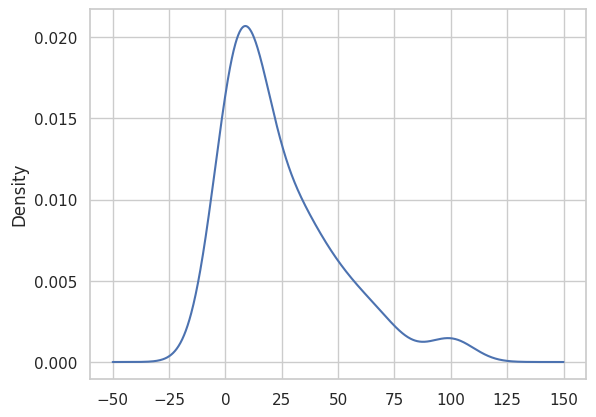

In [ ]:
temp['Importance'].plot(kind="kde")

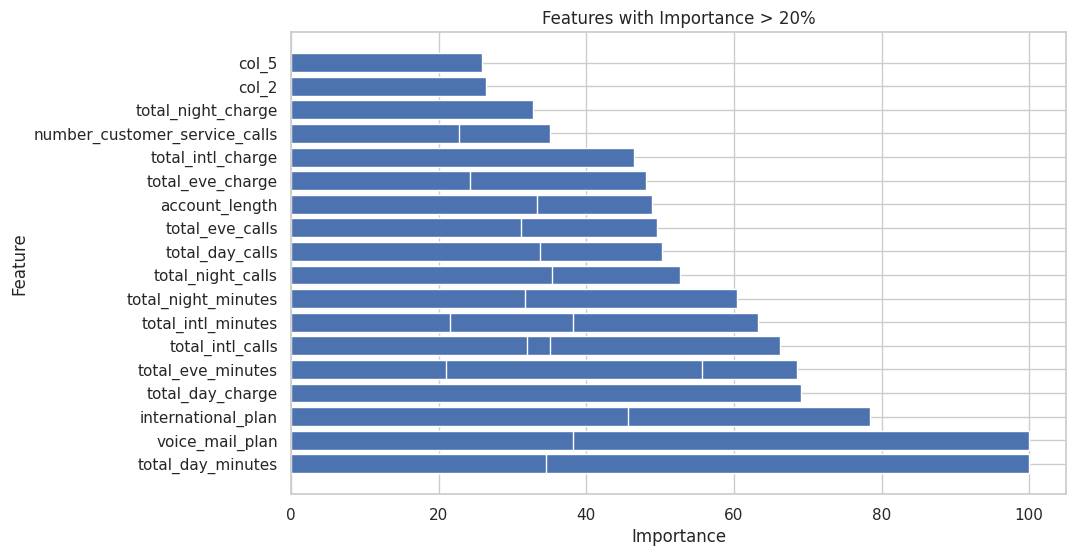


most important 20% features out of 84 is 35


In [ ]:
# lets take only thouse features, which server model atleast 25% importance.
import matplotlib.pyplot as plt

# Filter features with importance greater than 25%
important_features = temp[temp['Importance'] > 20]

# Plot the result
plt.figure(figsize=(10, 6))
plt.barh(important_features['Feature'], important_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features with Importance > 20%')
plt.show()
print()
print(f"most important 20% features out of {len(temp.Feature)} is {len(important_features)}")

In [ ]:
print(list(important_features['Feature']))

['total_day_minutes', 'total_day_minutes', 'voice_mail_plan', 'international_plan', 'total_day_charge', 'total_eve_minutes', 'total_intl_calls', 'total_intl_minutes', 'total_night_minutes', 'total_eve_minutes', 'total_night_calls', 'total_day_calls', 'total_eve_calls', 'account_length', 'total_eve_charge', 'total_intl_charge', 'international_plan', 'voice_mail_plan', 'total_intl_minutes', 'total_night_calls', 'number_customer_service_calls', 'total_intl_calls', 'total_day_minutes', 'total_day_calls', 'account_length', 'total_night_charge', 'total_intl_calls', 'total_night_minutes', 'total_eve_calls', 'col_2', 'col_5', 'total_eve_charge', 'number_customer_service_calls', 'total_intl_minutes', 'total_eve_minutes']
